# 2023 - 02 - 03
# [ python data mini project ]

In [1]:
!pip install folium
!pip install ipyleaflet

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium 

#지도 시각화에 필요한 라이브러리 import 하기
from folium import Marker, Icon
import pandas as pd
import csv, time

# <황도희>

In [3]:
AED_total_df = pd.read_csv('data/자동심장 충격기 정보 조회(AED)(표준 데이터).csv', encoding = 'euc-kr')
AED_total_df

,AED모델명,우편번호(앞자리),우편번호(뒤자리),관리책임자명,관리자연락처,설치기관주소,설치기관전화번호,설치위치,제조사,설치기관명,경도,위도
0,i-PAD NFK200,43,98,최형용,02-2199-8686,서울특별시 용산구 서빙고로 279,02-2199-8686,1층 민원실,(주)씨유네트웍스,서빙고동주민센터,126.994353,37.520253
1,NF1200,43,68,김용인,02-707-2492,서울특별시 용산구 백범로 350,02-707-2492,3층 헬스장,씨유메디컬시스템,용산구문화체육센터(용산구시설관리공단),126.967628,37.537242
2,i-PAD NFK200,43,35,심애숙,070-4658-1107,서울특별시 용산구 두텁바위로 25,070-4658-1107,2층 현관 엘리베이터 옆,(주)씨유네트웍스,갈월종합사회복지관,126.974825,37.545774
3,HeartPro NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동 경비실,나눔테크,도봉극동아파트,127.049310,37.682624
4,NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동,(주)나눔테크,도봉극동아파트,127.049310,37.682623
...,...,...,...,...,...,...,...,...,...,...,...,...
6046,Heart on A15-G14,51,18,김동한,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,201동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824
6047,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,202동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824
6048,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,204동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824
6049,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,203동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824


In [4]:
AED_total_df.설치기관명.where(AED_total_df.설치기관명.str.contains('호선'), np.nan, inplace = True)
AED_total_df.설치기관명.unique()

array([nan, '2호선 강변역', '2호선 신설동역', '9호선구반포역', '9호선신반포역', '9호선사평역',
       '9호선동작역', '9호선흑석역', '9호선노들역', '9호선노량진역', '2호선사당역', '7호선숭실대입구역',
       '2호선 구로디지털단지역', '신도림역(2호선)', '9호선고속터미널역', '4호선 쌍문역', '7호선 도봉산역',
       '9호선 선유도역', '9호선당산역', '9호선 국회의사당역', '9호선 여의도역', '9호선샛강역',
       '5호선 여의나루역', '7호선대림역', '2호선 양천구청역', '9호선 신목동역', '5호선 동대문역사문화공원역',
       '34호선 충무로역', '4호선 회현역', '2호선 을지로3가역', '3호선 을지로3가역', '3호선 약수역',
       '6호선 약수역', '2호선 을지로4가역', '을지로4가역(5호선)', '3호선 동대입구역', '56호선 청구역',
       '6호선 버티고개역', '6호선 안암역', '6호선 월곡역', '6호선 돌곶이역', '6호선 상월곡역',
       '4호선 길음역', '4호선 한성대입구역', '2호선 잠실새내역', '3호선 가락시장역', '3호선 경찰병원역',
       '3호선오금역', '7호선 건대입구역', '5호선 광나루역', '5호선 아차산역', '5호선군자역', '7호선군자역',
       '7호선 중곡역', '3호선 압구정역', '3호선 도곡역', '9호선 신논현역', '2호선왕십리역', '2호선한양대역',
       '2호선성수역', '3호선금호역', '3호선옥수역', '5호선답십리역', '5호선행당역', '5호선신금호역',
       '서울시도시철도공사(5호선 공덕역)', '서울교통공사(6호선합정역)', '노원역7호선', '노원역4호선',
       '석계역 6호선', '6호선 신당역', '2호선 신당역', '2호선 을지로입구역', '1호선 시청역',
       '4호선 명동역', '2호선 

In [5]:
# 데이터 오류 및 결측치 없는지 점검
AED_total_df.count()

AED모델명       6051
우편번호(앞자리)    6051
우편번호(뒤자리)    6051
관리책임자명       6051
관리자연락처       6051
설치기관주소       6051
설치기관전화번호     6051
설치위치         6051
제조사          6050
설치기관명         214
경도           6051
위도           6051
dtype: int64

## 서울특별시 지하철역에서 AED 설치된 역은 파랑, 설치 안된 역은 빨강으로 map에 표시

### [ 서울 + 수도권 전체 역 정보 ]

In [6]:
JSONDict = {
   "가락시장":[37.492522,127.118234],
   "종로3가":[37.571607,126.991806],
   "오금":[37.502162,127.128111],
   "동대문":[37.57142,127.009745],
   "동대문역사문화공원":[37.565138,127.007896],
   "충무로":[37.561243,126.99428],
   "서울":[37.554648,126.972559],
   "신도림":[37.508725,126.891295],
   "이촌":[37.522272,126.974345],
   "왕십리":[37.561533,127.037732],
   "시청":[37.564718,126.977108],
   "교대":[37.493415,127.01408],
   "신설동":[37.575297,127.025087],
   "강변":[37.535095,127.094681],
   "까치산":[37.531768,126.846683],
   "을지로3가":[37.566295,126.99191],
   "홍대입구":[37.557192,126.925381],
   "광운대":[37.623632,127.061835],
   "상봉":[37.596362,127.085032],
   "망우":[37.59955,127.091909],
   "영등포구청":[37.52497,126.895951],
   "신길":[37.517122,126.917169],
   "을지로4가":[37.566941,126.998079],
   "합정":[37.549463,126.913739],
   "공덕":[37.544018,126.951592],
   "삼각지":[37.534777,126.97311],
   "약수":[37.55434,127.010655],
   "신당":[37.565972,127.01782],
   "동묘앞":[37.572627,127.016429],
   "석계":[37.614805,127.065851],
   "도봉산":[37.689313,127.046222],
   "불광":[37.610469,126.929887],
   "연신내":[37.619001,126.921008],
   "금정":[37.372221,126.943429],
   "수원":[37.265974,126.999874],
   "원인재":[37.412603,126.687389],
   "회기":[37.58946,127.057583],
   "대곡":[37.631626,126.811024],
   "디지털미디어시티":[37.576646,126.900984],
   "회룡":[37.724846,127.046895],
   "판교":[37.394761,127.111217],
   "오이도":[37.362357,126.738714],
   "이매":[37.396104,127.12827],
   "선정릉":[37.51098,127.043593],
   "종합운동장":[37.510997,127.073642],
   "천호":[37.538397,127.123572],
   "창동":[37.653166,127.047731],
   "사당":[37.47653,126.981685],
   "노원":[37.655128,127.061368],
   "군자":[37.557121,127.079542],
   "건대입구":[37.540693,127.07023],
   "고속터미널":[37.50481,127.004943],
   "총신대입구(이수)":[37.486263,126.981989],
   "대림":[37.49297,126.895801],
   "가산디지털단지":[37.481072,126.882343],
   "온수":[37.492258,126.823388],
   "부평구청":[37.508336,126.720548],
   "잠실":[37.51395,127.102234],
   "복정":[37.470047,127.126662],
   "모란":[37.43213,127.129087],
   "부평":[37.489493,126.724805],
   "당산":[37.53438,126.902281],
   "여의도":[37.521624,126.924191],
   "동작":[37.502971,126.979306],
   "김포공항":[37.562434,126.801058],
   "강남":[37.497175,127.027926],
   "양재":[37.484147,127.034631],
   "정자":[37.36706,127.108105],
   "강남구청":[37.517186,127.04128],
   "선릉":[37.504503,127.049008],
   "효창공원앞":[37.539261,126.961351],
   "태릉입구":[37.617983,127.07512],
   "검암":[37.569104,126.673728],
   "주안":[37.464941,126.679923],
   "인천":[37.476691,126.616936],
   "인천시청":[37.457405,126.702221],
   "청량리":[37.580178,127.046835],
   "중랑":[37.594917,127.076116],
   "충정로":[37.559973,126.963672],
   "청구":[37.560245,127.013828],
   "성신여대입구":[37.592624,127.016403],
   "보문":[37.585286,127.019381],
   "계양":[37.571462,126.735637],
   "기흥":[37.275619,127.115936],
   "옥수":[37.540685,127.017965],
   "도곡":[37.490858,127.055381],
   "수서":[37.487371,127.10188],
   "용산":[37.529849,126.964561],
   "종각":[37.570161,126.982923],
   "종로5가":[37.570926,127.001849],
   "제기동":[37.578103,127.034893],
   "을지로입구":[37.566014,126.982618],
   "탑석":[37.733579,127.088704],
   "419민주묘지":[37.649593,127.013746],
   "가오리":[37.641701,127.016792],
   "화계":[37.634802,127.017519],
   "한티":[37.496237,127.052873],
   "구룡":[37.486839,127.058856],
   "홍제":[37.589066,126.943736],
   "김유정":[37.818466,127.71434],
   "남춘천":[37.864007,127.723792],
   "성균관대":[37.300349,126.97075],
   "경찰병원":[37.495918,127.12454],
   "구일":[37.496756,126.870793],
   "야탑":[37.411185,127.128715],
   "삼송":[37.653083,126.895558],
   "화정":[37.634592,126.83265],
   "영등포시장":[37.522669,126.905139],
   "상일동":[37.556712,127.166417],
   "공릉":[37.625742,127.072896],
   "상도":[37.502834,126.94791],
   "박촌":[37.553703,126.745077],
   "구성":[37.298969,127.105664],
   "인하대":[37.448493,126.649619],
   "숭의":[37.460789,126.638297],
   "센트럴파크":[37.393054,126.634729],
   "국제업무지구":[37.399907,126.630347],
   "강매":[37.612314,126.843223],
   "달월":[37.379681,126.745177],
   "원흥":[37.650658,126.872642],
   "완정":[37.592928,126.673203],
   "지평":[37.476444,127.629617],
   "석바위시장":[37.457611,126.692575],
   "상왕십리":[37.564354,127.029354],
   "한양대":[37.555273,127.043655],
   "뚝섬":[37.547184,127.047367],
   "성수":[37.544581,127.055961],
   "청계산입구":[37.447211,127.055664],
   "북한산우이":[37.663146,127.012789],
   "구의":[37.537077,127.085916],
   "잠실나루":[37.520733,127.10379],
   "잠실새내":[37.511687,127.086162],
   "삼성":[37.508844,127.06316],
   "역삼":[37.500622,127.036456],
   "서초":[37.491897,127.007917],
   "방배":[37.481426,126.997596],
   "낙성대":[37.47693,126.963693],
   "서울대입구":[37.481247,126.952739],
   "봉천":[37.482362,126.941892],
   "신림":[37.484201,126.929715],
   "신대방":[37.487462,126.913149],
   "구로디지털단지":[37.485266,126.901401],
   "문래":[37.517933,126.89476],
   "신촌":[37.555134,126.936893],
   "이대":[37.556733,126.946013],
   "아현":[37.557345,126.956141],
   "용답":[37.561904,127.050899],
   "신답":[37.57004,127.046481],
   "도림천":[37.514287,126.882768],
   "양천구청":[37.512398,126.865819],
   "신정네거리":[37.520074,126.852912],
   "용두":[37.574028,127.038091],
   "지축":[37.648048,126.913951],
   "구파발":[37.636763,126.918821],
   "녹번":[37.600927,126.935756],
   "무악재":[37.582299,126.950291],
   "독립문":[37.574571,126.957748],
   "경복궁":[37.575762,126.97353],
   "안국":[37.576477,126.985443],
   "동대입구":[37.559052,127.005602],
   "금호":[37.548034,127.015872],
   "압구정":[37.527072,127.028461],
   "신사":[37.516334,127.020114],
   "잠원":[37.512759,127.01122],
   "남부터미널":[37.485013,127.016189],
   "매봉":[37.486947,127.046769],
   "대치":[37.494612,127.063642],
   "학여울":[37.496663,127.070594],
   "대청":[37.493514,127.079532],
   "일원":[37.483681,127.08439],
   "당고개":[37.670272,127.079066],
   "상계":[37.660878,127.073572],
   "쌍문":[37.648627,127.034709],
   "수유":[37.638052,127.025732],
   "미아":[37.62667,127.025983],
   "미아사거리":[37.613292,127.030053],
   "길음":[37.603407,127.025053],
   "한성대입구":[37.588458,127.006221],
   "혜화":[37.582336,127.001844],
   "명동":[37.560989,126.986325],
   "회현":[37.558514,126.978246],
   "숙대입구":[37.54456,126.972106],
   "신용산":[37.52917,126.967894],
   "남태령":[37.463873,126.989134],
   "남영":[37.541021,126.9713],
   "노량진":[37.514219,126.942454],
   "대방":[37.513342,126.926382],
   "영등포":[37.515504,126.907628],
   "서빙고":[37.519594,126.988537],
   "한남":[37.52943,127.009169],
   "응봉":[37.549946,127.034538],
   "외대앞":[37.596073,127.063549],
   "신이문":[37.601854,127.067325],
   "월계":[37.633212,127.058831],
   "녹천":[37.644799,127.051269],
   "개포동":[37.489116,127.06614],
   "대모산입구":[37.491373,127.07272],
   "양원":[37.606596,127.107906],
   "구리":[37.603392,127.143869],
   "도농":[37.608806,127.161153],
   "양정":[37.60533,127.19364],
   "덕소":[37.586781,127.208832],
   "도심":[37.579622,127.222672],
   "팔당":[37.547371,127.243939],
   "운길산":[37.554669,127.310115],
   "양수":[37.545981,127.329098],
   "신원":[37.525545,127.372921],
   "국수":[37.516169,127.399367],
   "아신":[37.51382,127.443173],
   "오빈":[37.506062,127.473868],
   "양평(경의중앙선)":[37.492832,127.491814],
   "원덕":[37.468672,127.547076],
   "용문":[37.48223,127.594647],
   "서울(경의중앙선)":[37.556328,126.969522],
   "신촌(경의중앙선)":[37.559783,126.942319],
   "서강대":[37.551881,126.935711],
   "가좌":[37.568491,126.915487],
   "수색":[37.580842,126.895611],
   "화전":[37.602888,126.868387],
   "행신":[37.612102,126.834146],
   "능곡":[37.618808,126.820783],
   "곡산":[37.645676,126.801762],
   "백마":[37.658239,126.794461],
   "풍산":[37.672346,126.786243],
   "일산":[37.682077,126.769846],
   "탄현":[37.694023,126.761086],
   "야당":[37.712327,126.761356],
   "운정":[37.725826,126.767257],
   "금릉":[37.751322,126.765347],
   "금촌":[37.766217,126.774644],
   "월롱":[37.796188,126.792587],
   "파주":[37.815298,126.792783],
   "문산":[37.854619,126.788047],
   "신내":[37.612887,127.103218],
   "갈매":[37.634118,127.114757],
   "별내":[37.64202,127.12684],
   "퇴계원":[37.648311,127.143952],
   "사릉":[37.65108,127.176933],
   "금곡":[37.637382,127.207853],
   "평내호평":[37.653225,127.244493],
   "천마산":[37.658978,127.285379],
   "마석":[37.652782,127.311767],
   "대성리":[37.684071,127.379319],
   "청평":[37.735488,127.42661],
   "상천":[37.770246,127.454821],
   "가평":[37.814536,127.510739],
   "굴봉산":[37.832067,127.557695],
   "백양리":[37.830779,127.58933],
   "강촌":[37.805723,127.634146],
   "춘천":[37.885054,127.717023],
   "봉명":[36.801215,127.135763],
   "쌍용(나사렛대)":[36.793759,127.1214],
   "아산":[36.792053,127.104361],
   "배방":[36.777629,127.052991],
   "온양온천":[36.780483,127.003249],
   "신창":[36.769502,126.951108],
   "선바위":[37.451673,127.002303],
   "경마공원":[37.443885,127.007888],
   "과천":[37.433021,126.996568],
   "정부과천청사":[37.426513,126.98978],
   "인덕원":[37.401553,126.976715],
   "평촌":[37.394287,126.963883],
   "범계":[37.389793,126.950806],
   "삼동":[37.409522,127.20336],
   "경기광주":[37.399907,126.630347],
   "초월":[37.374419,127.299],
   "곤지암":[37.351315,127.34674],
   "신둔도예촌":[37.317185,127.40476],
   "이천":[37.265579,127.44226],
   "부발":[37.260192,127.490277],
   "세종대왕릉":[37.295309,127.570938],
   "여주":[37.282701,127.628607],
   "구로":[37.503039,126.881966],
   "금천구청":[37.455626,126.89398],
   "석수":[37.435047,126.902295],
   "안양":[37.401592,126.922874],
   "명학":[37.384653,126.935433],
   "군포":[37.35356,126.948462],
   "의왕":[37.320852,126.948217],
   "화서":[37.283862,126.989627],
   "독산":[37.466613,126.889249],
   "세류":[37.245025,127.013222],
   "병점":[37.207503,127.032731],
   "세마":[37.187533,127.04318],
   "오산대":[37.168953,127.063197],
   "오산":[37.145885,127.06672],
   "진위":[37.109447,127.062278],
   "송탄":[37.075696,127.054301],
   "서정리":[37.056496,127.052819],
   "지제":[37.0188,127.070444],
   "평택":[36.990726,127.085159],
   "성환":[36.916076,127.126964],
   "직산":[36.870593,127.143904],
   "두정":[36.833705,127.14896],
   "천안":[36.810005,127.146826],
   "당정":[37.344285,126.948345],
   "서동탄":[37.195504,127.051672],
   "광명":[37.416182,126.884466],
   "산본":[37.358101,126.933274],
   "대야미":[37.328467,126.917332],
   "반월":[37.312212,126.903524],
   "상록수":[37.302795,126.866489],
   "한대앞":[37.309689,126.85344],
   "중앙":[37.315941,126.838573],
   "고잔":[37.316777,126.823249],
   "초지":[37.320646,126.805913],
   "안산":[37.327082,126.788532],
   "신길온천":[37.338212,126.765844],
   "정왕":[37.351735,126.742989],
   "수리산":[37.349801,126.925365],
   "개봉":[37.494594,126.85868],
   "오류동":[37.494526,126.845365],
   "역곡":[37.485178,126.811502],
   "부천":[37.48405,126.782686],
   "송내":[37.4876,126.753664],
   "백운":[37.483664,126.707704],
   "동암":[37.471408,126.702896],
   "제물포":[37.466769,126.656666],
   "동인천":[37.475276,126.632802],
   "부개":[37.488418,126.74109],
   "간석":[37.464737,126.694181],
   "도원":[37.468446,126.642706],
   "중동":[37.486562,126.764843],
   "도화":[37.46607,126.668672],
   "서울숲":[37.543617,127.044707],
   "압구정로데오":[37.527381,127.040534],
   "소사":[37.482753,126.79544],
   "가천대":[37.448605,127.126697],
   "태평":[37.440019,127.127709],
   "서현":[37.385126,127.123592],
   "수내":[37.378455,127.114322],
   "미금":[37.350077,127.10891],
   "보정":[37.312752,127.108196],
   "죽전":[37.324753,127.107395],
   "신갈":[37.286102,127.111313],
   "상갈":[37.26181,127.108847],
   "청명":[37.259489,127.078934],
   "영통":[37.251568,127.071394],
   "망포":[37.245795,127.057353],
   "매탄권선":[37.252759,127.040566],
   "수원시청":[37.261911,127.030736],
   "매교":[37.265481,127.015678],
   "월곶":[37.391769,126.742699],
   "소래포구":[37.40095,126.733522],
   "인천논현":[37.400614,126.722478],
   "호구포":[37.401637,126.708627],
   "남동인더스파크":[37.407722,126.695216],
   "연수":[37.417804,126.67894],
   "송도":[37.428514,126.657772],
   "신포":[37.46874,126.623853],
   "방학":[37.667503,127.044273],
   "도봉":[37.679563,127.045595],
   "망월사":[37.709914,127.047455],
   "의정부":[37.738415,127.045958],
   "가능":[37.748577,127.044213],
   "녹양":[37.75938,127.042292],
   "양주":[37.774381,127.044708],
   "덕계":[37.818486,127.056486],
   "덕정":[37.843188,127.061277],
   "지행":[37.892334,127.055716],
   "동두천중앙":[37.901885,127.056482],
   "보산":[37.913702,127.057277],
   "동두천":[37.927878,127.05479],
   "소요산":[37.9481,127.061034],
   "원당":[37.653324,126.843041],
   "백석":[37.643114,126.78787],
   "마두":[37.652206,126.77762],
   "정발산":[37.659477,126.773359],
   "주엽":[37.670072,126.761334],
   "대화":[37.676087,126.747569],
   "방화":[37.577446,126.812741],
   "개화산":[37.572399,126.806171],
   "송정":[37.561184,126.811973],
   "마곡":[37.560183,126.825448],
   "발산":[37.558598,126.837668],
   "우장산":[37.548768,126.836318],
   "화곡":[37.541513,126.840461],
   "신정":[37.524997,126.856191],
   "목동":[37.526065,126.864931],
   "오목교":[37.524496,126.875181],
   "양평":[37.525648,126.885778],
   "여의나루":[37.527098,126.932901],
   "마포":[37.539574,126.945932],
   "애오개":[37.553736,126.95682],
   "서대문":[37.565773,126.966641],
   "광화문":[37.571026,126.976669],
   "신금호":[37.554548,127.020331],
   "행당":[37.557322,127.029476],
   "마장":[37.5661,127.042973],
   "답십리":[37.566747,127.052704],
   "장한평":[37.56144,127.064623],
   "아차산":[37.551691,127.089761],
   "광나루":[37.545303,127.10357],
   "강동":[37.535804,127.132481],
   "길동":[37.537801,127.140004],
   "굽은다리":[37.545477,127.142853],
   "명일":[37.55137,127.143999],
   "고덕":[37.555004,127.154151],
   "둔촌동":[37.527788,127.136248],
   "올림픽공원":[37.516078,127.130848],
   "방이":[37.508857,127.126133],
   "개롱":[37.498079,127.13482],
   "거여":[37.493105,127.14415],
   "마천":[37.49499,127.152781],
   "응암":[37.598605,126.915577],
   "역촌":[37.606021,126.922744],
   "독바위":[37.618456,126.933031],
   "구산":[37.611377,126.91727],
   "새절":[37.591148,126.913629],
   "증산":[37.583876,126.909645],
   "월드컵경기장":[37.569532,126.899298],
   "마포구청":[37.563515,126.903343],
   "망원":[37.556094,126.910052],
   "상수":[37.547716,126.922852],
   "광흥창":[37.547456,126.931993],
   "대흥":[37.547771,126.942069],
   "녹사평":[37.534675,126.986695],
   "이태원":[37.534488,126.994302],
   "한강진":[37.539631,127.001725],
   "버티고개":[37.548013,127.007055],
   "창신":[37.579661,127.015241],
   "안암":[37.586272,127.029005],
   "고려대":[37.590508,127.036296],
   "월곡":[37.601948,127.041518],
   "상월곡":[37.606377,127.048491],
   "돌곶이":[37.610537,127.056431],
   "화랑대":[37.620064,127.084689],
   "봉화산":[37.617283,127.091401],
   "장암":[37.700109,127.053196],
   "수락산":[37.67785,127.055315],
   "마들":[37.66494,127.057675],
   "중계":[37.644583,127.064303],
   "하계":[37.636352,127.06799],
   "먹골":[37.610637,127.077725],
   "중화":[37.602545,127.079264],
   "면목":[37.588579,127.087503],
   "사가정":[37.580894,127.088478],
   "용마산":[37.573647,127.086727],
   "중곡":[37.565923,127.08432],
   "어린이대공원":[37.548014,127.074658],
   "뚝섬유원지":[37.53154,127.066704],
   "청담":[37.519365,127.05335],
   "학동":[37.514229,127.031656],
   "논현":[37.511093,127.021415],
   "반포":[37.508178,127.011727],
   "내방":[37.487618,126.993513],
   "남성":[37.484596,126.971251],
   "숭실대입구":[37.496029,126.953822],
   "장승배기":[37.504898,126.93915],
   "신대방삼거리":[37.499701,126.928276],
   "보라매":[37.499872,126.920428],
   "신풍":[37.50008,126.90993],
   "남구로":[37.486056,126.887249],
   "철산":[37.47605,126.867911],
   "광명사거리":[37.479252,126.854876],
   "천왕":[37.486637,126.838713],
   "까치울":[37.506207,126.810939],
   "부천종합운동장":[37.50538,126.797337],
   "춘의":[37.503663,126.787036],
   "신중동":[37.503048,126.77596],
   "부천시청":[37.504631,126.763538],
   "상동":[37.505781,126.753083],
   "삼산체육관":[37.506411,126.742153],
   "굴포천":[37.506997,126.73128],
   "암사":[37.55021,127.127562],
   "강동구청":[37.530341,127.120508],
   "몽촌토성":[37.517409,127.112359],
   "석촌":[37.505431,127.106979],
   "송파":[37.499703,127.112183],
   "문정":[37.485855,127.1225],
   "장지":[37.478703,127.126191],
   "산성":[37.457122,127.149908],
   "남한산성입구":[37.451535,127.159816],
   "단대오거리":[37.44521,127.156866],
   "신흥":[37.440918,127.147564],
   "수진":[37.437428,127.140722],
   "귤현":[37.566379,126.742654],
   "임학":[37.545059,126.738665],
   "경인교대입구":[37.538157,126.722597],
   "작전":[37.530415,126.722527],
   "갈산":[37.517268,126.721514],
   "부평시장":[37.498383,126.722244],
   "동수":[37.485312,126.718247],
   "부평삼거리":[37.477679,126.710208],
   "간석오거리":[37.467048,126.707938],
   "예술회관":[37.449396,126.701012],
   "인천터미널":[37.442383,126.699706],
   "문학경기장":[37.434935,126.698579],
   "선학":[37.426684,126.698863],
   "신연수":[37.41804,126.693863],
   "동춘":[37.404737,126.681015],
   "동막":[37.397878,126.674005],
   "캠퍼스타운":[37.387855,126.661673],
   "테크노파크":[37.382268,126.656365],
   "지식정보단지":[37.378384,126.645168],
   "인천대입구":[37.386007,126.639484],
   "검단오류":[37.594877,126.627178],
   "왕길":[37.59518,126.642696],
   "검단사거리":[37.60185,126.657108],
   "마전":[37.597566,126.666998],
   "독정":[37.585212,126.675844],
   "검바위":[37.561405,126.677566],
   "아시아드경기장":[37.5517,126.677122],
   "서구청":[37.543742,126.676787],
   "가정중앙시장":[37.517054,126.676672],
   "석남":[37.506193,126.676203],
   "서부여성회관":[37.506193,126.676203],
   "인천가좌":[37.4897,126.675208],
   "가재울":[37.484192,126.683673],
   "주안국가산단":[37.473703,126.68113],
   "시민공원":[37.458335,126.681192],
   "석천사거리":[37.456805,126.709986],
   "모래내시장":[37.45583,126.719298],
   "만수":[37.454911,126.732094],
   "남동구청":[37.448161,126.736939],
   "인천대공원":[37.448769,126.752618],
   "운연":[37.440127,126.75997],
   "개화":[37.578608,126.798153],
   "공항시장":[37.563726,126.810678],
   "신방화":[37.567532,126.816601],
   "마곡나루":[37.567336,126.829497],
   "양천향교":[37.568381,126.841333],
   "가양":[37.561391,126.854456],
   "증미":[37.557402,126.861939],
   "등촌":[37.550632,126.865689],
   "염창":[37.546936,126.874916],
   "신목동":[37.544277,126.88308],
   "선유도":[37.53802,126.893525],
   "국회의사당":[37.528105,126.917874],
   "샛강":[37.517274,126.928422],
   "노들":[37.512887,126.953222],
   "흑석":[37.50877,126.963708],
   "구반포":[37.501364,126.987332],
   "신반포":[37.503415,126.995925],
   "사평":[37.504206,127.015259],
   "신논현":[37.504598,127.02506],
   "언주":[37.507287,127.033868],
   "삼성중앙":[37.513011,127.053282],
   "봉은사":[37.514219,127.060245],
   "청라국제도시":[37.555878,126.625327],
   "운서":[37.492904,126.49379],
   "공항화물청사":[37.458366,126.476241],
   "인천국제공항":[37.447464,126.452508],
   "영종":[37.511466,126.5237],
   "양재시민의숲":[37.470023,127.03842],
   "김량장":[37.237247,127.198781],
   "운동장·송담대":[37.237845,127.209198],
   "고진":[37.24484,127.214251],
   "보평":[37.258965,127.218457],
   "둔전":[37.267051,127.21364],
   "전대·에버랜드":[37.285342,127.219561],
   "발곡":[37.727048,127.052803],
   "범골":[37.728755,127.04353],
   "경전철의정부":[37.737202,127.043257],
   "의정부시청":[37.739256,127.034781],
   "흥선":[37.743302,127.037023],
   "의정부중앙":[37.743676,127.049565],
   "동오":[37.745271,127.056947],
   "새말":[37.748885,127.06362],
   "경기도청북부청사":[37.75059,127.071495],
   "효자":[37.754025,127.076902],
   "곤제":[37.750471,127.083715],
   "어룡":[37.742802,127.085035],
   "송산":[37.737279,127.087159],
   "솔밭공원":[37.656088,127.013252],
   "삼양":[37.627165,127.018152],
   "삼양사거리":[37.621512,127.02048],
   "솔샘":[37.62124,127.013528],
   "북한산보국문":[37.612343,127.008009],
   "정릉":[37.602798,127.01349],
   "동천":[37.337928,127.102976],
   "수지구청":[37.322702,127.095026],
   "성복":[37.313335,127.0801],
   "상현":[37.297664,127.069342],
   "광교중앙":[37.288617,127.051478],
   "광교":[37.30211,127.044483],
   "강남대":[37.270161,127.126033],
   "지석":[37.269606,127.136515],
   "어정":[37.274917,127.143714],
   "동백":[37.269043,127.152716],
   "초당":[37.260752,127.159443],
   "삼가":[37.242115,127.168075],
   "시청·용인대":[37.239151,127.178406],
   "명지대":[37.237964,127.190294]
}

In [7]:
# 설치기관명에서 지하철만 출력해서 엑셀 만들어 호출
Installed_AED_subway = pd.read_excel('data/AED 설치 역 출력.xlsx').메뉴

# 값을 '호선'을 기준으로 분리 --> 2개의 열을 만들어 csv 파일로 출력 후 --> excel로 수작업 진행
#Installed_AED_subway1 = Installed_AED_subway.str.split('호선').str[0]
#Installed_AED_subway2 = Installed_AED_subway.str.split('호선').str[1]
#data = {'Installed_AED_subway1' : Installed_AED_subway1,
#        'Installed_AED_subway2' : Installed_AED_subway2}
#Installed_AED_subway_df = pd.DataFrame(data, columns = ['Installed_AED_subway1', 'Installed_AED_subway2'])      
#Installed_AED_subway_df.Installed_AED_subway1.to_csv('test11', index = False)
#Installed_AED_subway_df.Installed_AED_subway2.to_csv('test12', index = False)

# 이름역 수정한 excel 불러온 후 --> 글자의 앞뒤 공백 제거
Installed_AED_subway_name = pd.read_excel('data/AED 설치 역 출력_only name.xlsx').Installed_AED_subway
Installed_AED_subway_name
# sereis 형태이기에 index를 입력하면 값이 호출되고 --> 그 호출된 값을 '역' 기준으로 분리하면 list 형태로 반환
# --> list의 0번째가 '역'을 제외한 이름 값이기에 [0]을 붙임 --> 그 값의 앞뒤 공백 제거를 위해 strip 함수 사용
for j in range(len(Installed_AED_subway_name)) : 
    Installed_AED_subway_name.at[j] = ( Installed_AED_subway_name.at[j].split('역') )[0].strip()

Installed_AED_subway_name

0         강변
1        신설동
2      청계산입구
3        구반포
4        신반포
       ...  
345       문래
346       공덕
347       신풍
348      여의도
349      동대문
Name: Installed_AED_subway, Length: 350, dtype: object

In [8]:
Installed_AED_subway_name[3]

'구반포'

In [43]:
JSONDict[Installed_AED_subway_name[3]]

[37.501364, 126.987332]

In [46]:
df1 = pd.read_excel('C:/python/data/전체_도시철도역사정보_서울_20230109.xlsx')
df1['역사명'] = df1.역사명.str.split('(').str[0]
df1[df1.역사명.str.contains("인천")]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17844\3781041746.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df1 = pd.read_excel('C:/python/data/전체_도시철도역사정보_서울_20230109.xlsx')


,역번호,역사명,노선번호,노선명,환승역구분,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자


In [47]:
# set을 통해 중복값 제거
result = set()
for idx, (key, value) in enumerate(JSONDict.items()) :
    for _, val in df1.역사명.items():
        if key in val : 
            # print(JSONDict[key])
            result.add(key)
result

{'가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강변',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '경복궁',
 '경찰병원',
 '고덕',
 '고려대',
 '고속터미널',
 '공덕',
 '공릉',
 '공항시장',
 '광나루',
 '광운대',
 '광화문',
 '광흥창',
 '교대',
 '구로',
 '구로디지털단지',
 '구룡',
 '구반포',
 '구산',
 '구의',
 '구일',
 '구파발',
 '국회의사당',
 '군자',
 '굽은다리',
 '금천구청',
 '금호',
 '길동',
 '길음',
 '김포공항',
 '까치산',
 '낙성대',
 '남구로',
 '남부터미널',
 '남성',
 '남영',
 '남태령',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평',
 '녹천',
 '논현',
 '답십리',
 '당고개',
 '당산',
 '대림',
 '대모산입구',
 '대방',
 '대청',
 '대치',
 '대흥',
 '도곡',
 '도림천',
 '도봉',
 '도봉산',
 '독립문',
 '독바위',
 '독산',
 '돌곶이',
 '동대문',
 '동대문역사문화공원',
 '동대입구',
 '동묘앞',
 '동작',
 '둔촌동',
 '등촌',
 '디지털미디어시티',
 '뚝섬',
 '뚝섬유원지',
 '마곡',
 '마곡나루',
 '마들',
 '마장',
 '마천',
 '마포',
 '마포구청',
 '망우',
 '망원',
 '매봉',
 '먹골',
 '면목',
 '명동',
 '명일',
 '목동',
 '몽촌토성',
 '무악재',
 '문래',
 '문정',
 '미아',
 '미아사거리',
 '반포',
 '발산',
 '방배',
 '방이',
 '방학',
 '방화',
 '버티고개',
 '보라매',
 '보문',
 '복정',
 '봉천',
 '봉화산',
 '북한산보국문',
 '북한산우이',
 '불광',
 '사가정',
 '사당',
 '사평',
 '삼각

In [48]:
# result를 통해 나온 지하철명에 대해 key(지하철명)와 value(좌표값) 가져오기
result_dic = {}
for val in list(result):
    result_dic[val] = JSONDict[val]
result_dic

{'삼성': [37.508844, 127.06316],
 '충무로': [37.561243, 126.99428],
 '신내': [37.612887, 127.103218],
 '남구로': [37.486056, 126.887249],
 '디지털미디어시티': [37.576646, 126.900984],
 '상봉': [37.596362, 127.085032],
 '혜화': [37.582336, 127.001844],
 '가산디지털단지': [37.481072, 126.882343],
 '선릉': [37.504503, 127.049008],
 '대청': [37.493514, 127.079532],
 '개봉': [37.494594, 126.85868],
 '중계': [37.644583, 127.064303],
 '행당': [37.557322, 127.029476],
 '석촌': [37.505431, 127.106979],
 '양천향교': [37.568381, 126.841333],
 '구반포': [37.501364, 126.987332],
 '동대입구': [37.559052, 127.005602],
 '목동': [37.526065, 126.864931],
 '광화문': [37.571026, 126.976669],
 '흑석': [37.50877, 126.963708],
 '사가정': [37.580894, 127.088478],
 '중랑': [37.594917, 127.076116],
 '북한산보국문': [37.612343, 127.008009],
 '뚝섬': [37.547184, 127.047367],
 '불광': [37.610469, 126.929887],
 '효창공원앞': [37.539261, 126.961351],
 '용산': [37.529849, 126.964561],
 '반포': [37.508178, 127.011727],
 '회현': [37.558514, 126.978246],
 '용답': [37.561904, 127.050899],
 '미아사거리': [37.613

In [49]:
center = [37.541, 126.986]
m1 = folium.Map(location = center, zoom_start=10)
tiles = "CartoDB positron"
folium.TileLayer(tiles=tiles).add_to(m1)
#icon = Icon(icon_url = 'https://gss0.baidu.com/-fo3dSag_xI4khGko9WTAnF6hhy/zhidao/wh%3D600%2C800/sign=364e1b[…]43c063e9bd81e72b/c8ea15ce36d3d53960b0b8a93887e950342ab0cf.jpg', 
#            iconsize = [38, 38])
# 전체 역에서 설치역 제외된 역들의 좌표
for n in list(result_dic.keys() - Installed_AED_subway_name) :
    non_installed_sub = result_dic[n]
    folium.CircleMarker(non_installed_sub, tooltip = n, color = 'red').add_to(m1)
#    folium.Marker(non_installed_sub, tooltip = n, icon = icon, color = 'red').add_to(m1)
    

#for idx, (key, value) in enumerate(JSONDict.items()):    
#    for _ in range(len(Installed_AED_subway_name)) :
#        if Installed_AED_subway_name[_] in key :
for _ in range(len(Installed_AED_subway_name)) :
    if Installed_AED_subway_name[_] in result_dic.keys() :
        folium.Marker(result_dic[Installed_AED_subway_name[_]], tooltip = Installed_AED_subway_name[_], color = 'blue').add_to(m1)
m1

# <김호영>

In [50]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
mpl.rcParams['font.family'] = 'NanumGothic'

In [51]:
# 유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus = False)

In [52]:
%matplotlib inline

In [53]:
plt.style.use('Solarize_Light2')

In [54]:
# CSV파일을 불러오기.
# encoding = UTF-8 이 안될경우 
df_subway = pd.read_csv('data/subway.csv',encoding='euc-kr', index_col='연번')
df_subway

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5


In [55]:
# 원본파일 손상 방지를 위한 복사본 만들기
df_subway_ = df_subway.copy()
df_subway_

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5


In [56]:
del df_subway_['역번호']

In [57]:
# 특정 컬럼에서 원하는 값 추출
weekday = df_subway_['조사일자'] == '평일'
df_subway_weekday = df_subway_[weekday]

sat = df_subway_['조사일자'] == '토요일'
df_subway_sat = df_subway_[sat]

sun = df_subway_['조사일자'] == '일요일'
df_subway_sun = df_subway_[sun]


In [58]:
# 특정 컬럼에서 원하는 값 추출
one_weekday = (df_subway_['호선'] == 1)&(df_subway_['조사일자'] == '평일')
df_subway_one_weekday = df_subway_[one_weekday]

two_weekday = (df_subway_['호선'] == 2)&(df_subway_['조사일자'] == '평일')
df_subway_two_weekday = df_subway_[two_weekday]

third_weekday = (df_subway_['호선'] == 3)&(df_subway_['조사일자'] == '평일')
df_subway_third_weekday = df_subway_[third_weekday]

fourth_weekday = (df_subway_['호선'] == 4)&(df_subway_['조사일자'] == '평일')
df_subway_fourth_weekday = df_subway_[fourth_weekday]

fifth_weekday = (df_subway_['호선'] == 5)&(df_subway_['조사일자'] == '평일')
df_subway_fifth_weekday = df_subway_[fifth_weekday]

sixth_weekday = (df_subway_['호선'] == 6)&(df_subway_['조사일자'] == '평일')
df_subway_sixth_weekday = df_subway_[sixth_weekday]

seventh_weekday = (df_subway_['호선'] == 7)&(df_subway_['조사일자'] == '평일')
df_subway_seventh_weekday = df_subway_[seventh_weekday]

eighth_weekday = (df_subway_['호선'] == 8)&(df_subway_['조사일자'] == '평일')
df_subway_eighth_weekday = df_subway_[eighth_weekday]

In [59]:
# 호선별 상위 10개의 역 데이터 추출

first_station_data = df_subway_one_weekday.groupby(df_subway_one_weekday.역명).mean()
del first_station_data['호선'] # 필요없는 컬럼 지우기 
first_station_data_T = first_station_data.T # 그래프 그리기 위한 전치

second_station_data = df_subway_two_weekday.groupby(df_subway_two_weekday.역명).mean()
del second_station_data['호선']
second_station_data['평균'] = second_station_data.mean(axis=1)
two_mean = second_station_data.sort_values(by='평균', ascending= False).head(10)
del two_mean['평균']
second_station_data_T = two_mean.T

third_station_data = df_subway_third_weekday.groupby(df_subway_third_weekday.역명).mean()
third_station_data
del third_station_data['호선']
third_station_data['평균'] = third_station_data.mean(axis=1)
three_mean = third_station_data.sort_values(by='평균', ascending= False).head(10)
del three_mean['평균']
third_station_data_T = three_mean.T
third_station_data_T

fourth_station_data = df_subway_fourth_weekday.groupby(df_subway_fourth_weekday.역명).mean()
del fourth_station_data['호선']
fourth_station_data['평균'] = fourth_station_data.mean(axis=1)
fourth_mean = fourth_station_data.sort_values(by='평균', ascending= False).head(10)
del fourth_mean['평균']
fourth_station_data_T = fourth_mean.T
fourth_station_data_T

fifth_station_data = df_subway_fifth_weekday.groupby(df_subway_fifth_weekday.역명).mean()
del fifth_station_data['호선']
fifth_station_data['평균'] = fifth_station_data.mean(axis=1)
fifth_mean = fifth_station_data.sort_values(by='평균', ascending= False).head(10)
del fifth_mean['평균']
fifth_station_data_T = fifth_mean.T

sixth_station_data = df_subway_sixth_weekday.groupby(df_subway_sixth_weekday.역명).mean()
del sixth_station_data['호선']
sixth_station_data['평균'] = sixth_station_data.mean(axis=1)
sixth_mean = sixth_station_data.sort_values(by='평균', ascending= False).head(10)
del sixth_mean['평균']
sixth_station_data_T = sixth_mean.T

seventh_station_data = df_subway_seventh_weekday.groupby(df_subway_seventh_weekday.역명).mean()
del seventh_station_data['호선']
seventh_station_data['평균'] = seventh_station_data.mean(axis=1)
seventh_mean = seventh_station_data.sort_values(by='평균', ascending= False).head(10)
del seventh_mean['평균']
seventh_station_data_T = seventh_mean.T

eighth_station_data = df_subway_eighth_weekday.groupby(df_subway_eighth_weekday.역명).mean()
del eighth_station_data['호선']
eighth_station_data['평균'] = eighth_station_data.mean(axis=1)
eighth_mean = eighth_station_data.sort_values(by='평균', ascending= False).head(10)
del eighth_mean['평균']
eighth_station_data_T = eighth_mean.T

### 라인 플롯 그리기

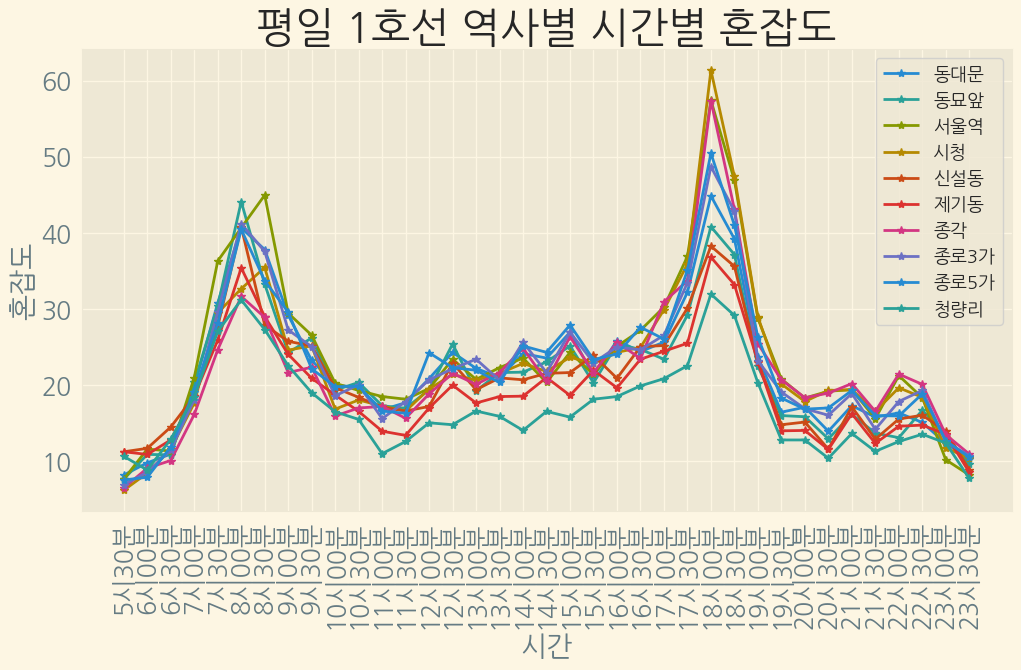

In [60]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_station_data_T ,'-*')
plt.title('평일 1호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(first_station_data_T.columns)
plt.show()

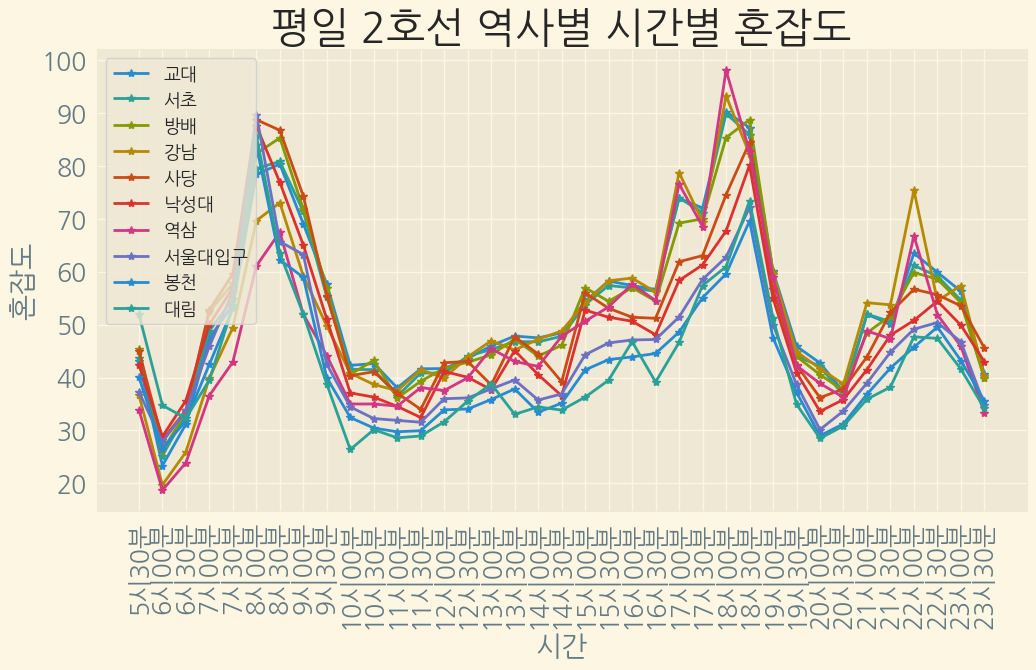

In [61]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_station_data_T ,'-*')
plt.title('평일 2호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(second_station_data_T.columns)
plt.show()

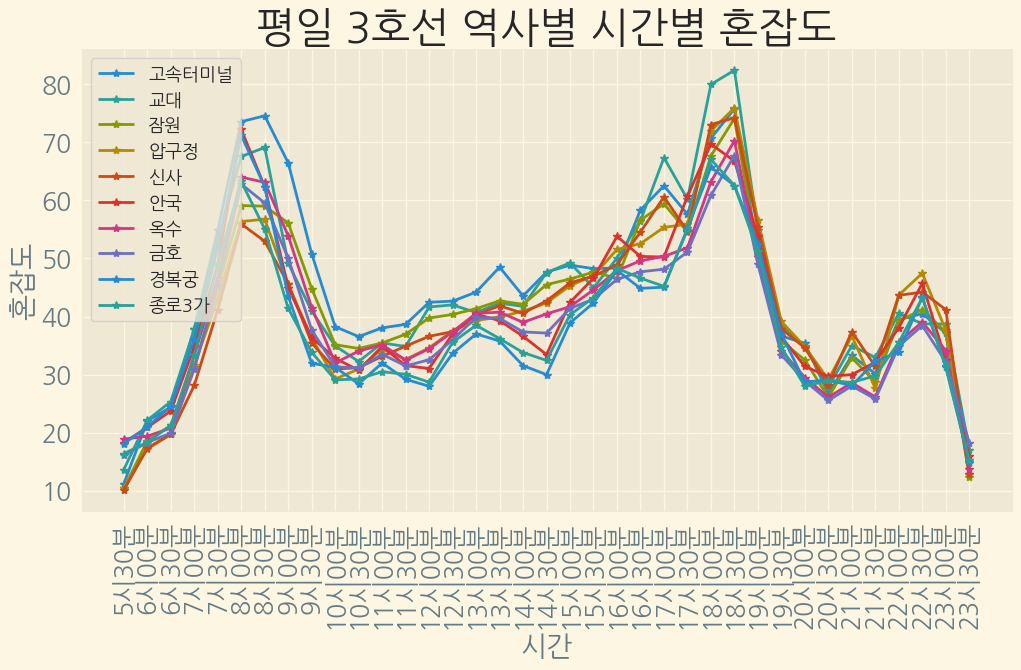

In [62]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_station_data_T ,'-*')
plt.title('평일 3호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(third_station_data_T.columns)
plt.show()

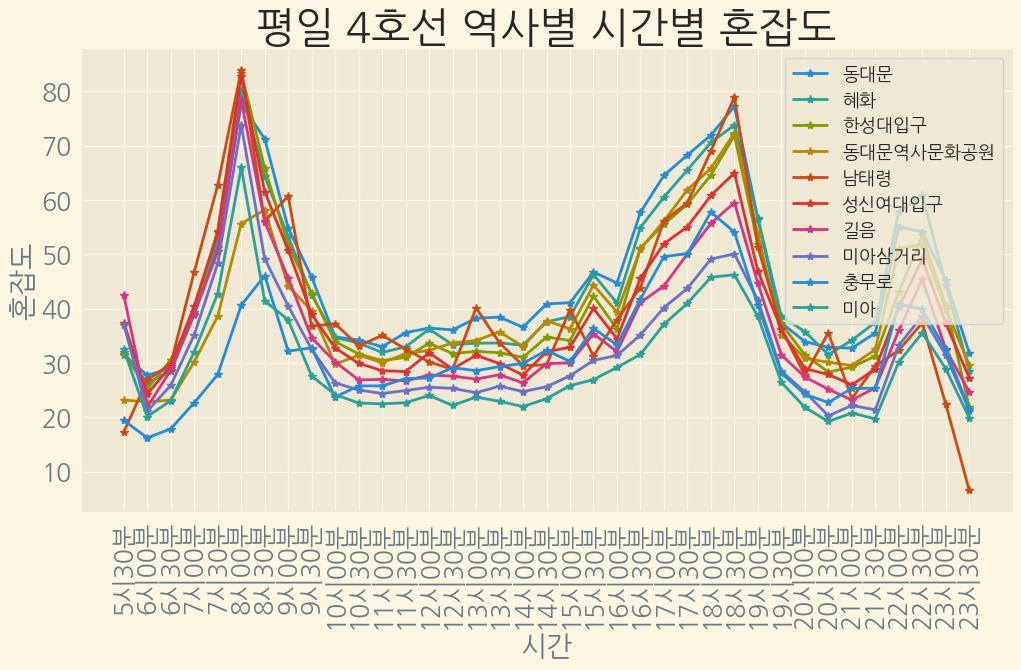

In [63]:
fig = plt.figure(figsize=(12,6))
plt.plot(fourth_station_data_T ,'-*')
plt.title('평일 4호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(fourth_station_data_T.columns)
plt.show()

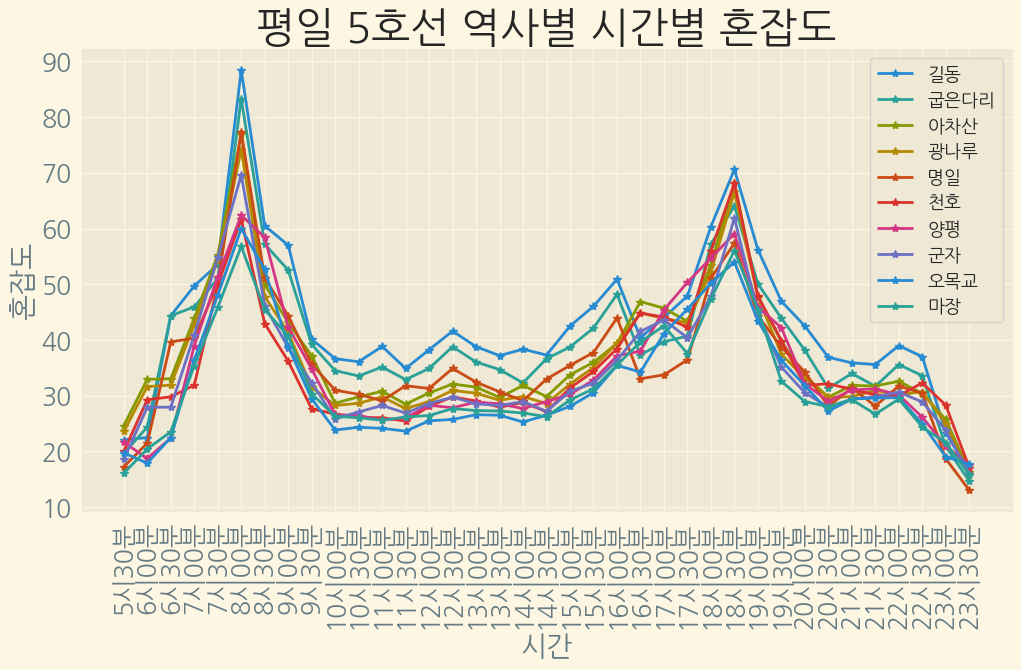

In [64]:
fig = plt.figure(figsize=(12,6))
plt.plot(fifth_station_data_T ,'-*')
plt.title('평일 5호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(fifth_station_data_T.columns)
plt.show()

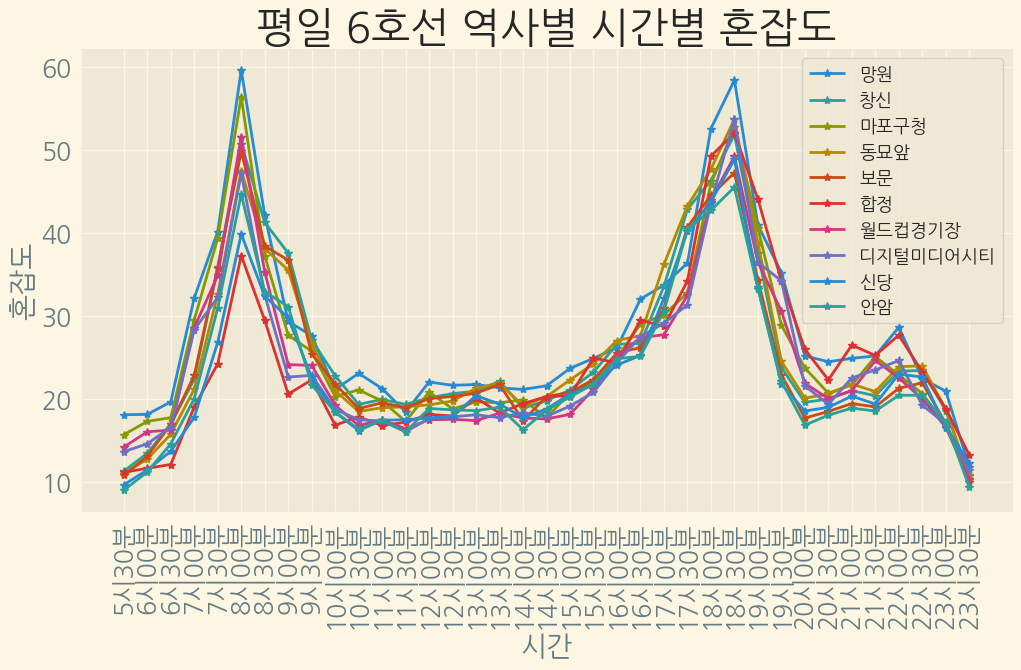

In [65]:
fig = plt.figure(figsize=(12,6))
plt.plot(sixth_station_data_T ,'-*')
plt.title('평일 6호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(sixth_station_data_T.columns)
plt.show()

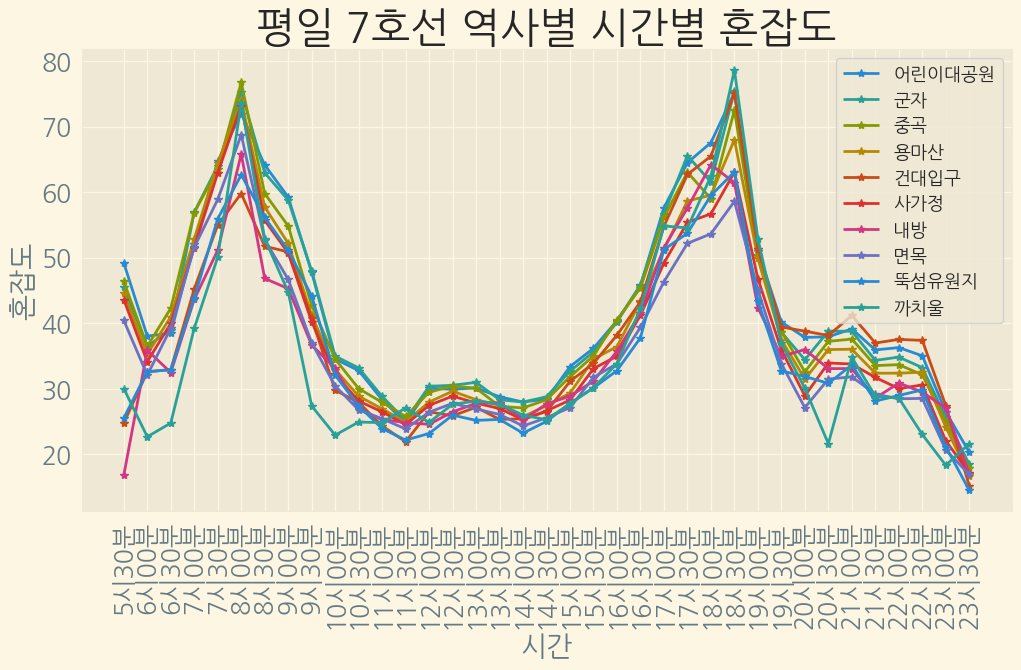

In [66]:
fig = plt.figure(figsize=(12,6))
plt.plot(seventh_station_data_T ,'-*')
plt.title('평일 7호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(seventh_station_data_T.columns)
plt.show()

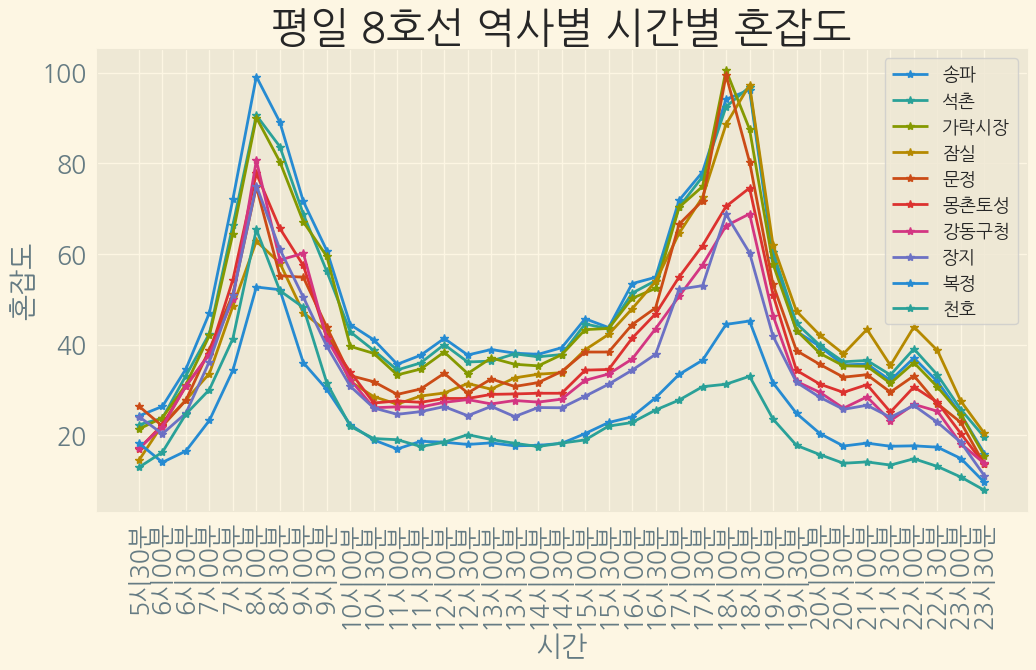

In [67]:
fig = plt.figure(figsize=(12,6))
plt.plot(eighth_station_data_T ,'-*')
plt.title('평일 8호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(eighth_station_data_T.columns)
plt.show()

In [68]:
line_data = df_subway_weekday.groupby(df_subway_.호선).mean() # 평일 호선별 시간 혼잡도 
line_data_sat = df_subway_sat.groupby(df_subway_.호선).mean() # 토요일 호선별 시간 혼잡도 
line_data_sun = df_subway_sun.groupby(df_subway_.호선).mean() # 일요일 호선별 시간 혼잡도
 

# 그래프를 그리기 위해 전치
line_data_T = line_data.T 
line_data_sat_T = line_data_sat.T
line_data_sun_T = line_data_sun.T

# 필요없는 행 지우기
del line_data_T[13],line_data_T[14],line_data_T[15]
del line_data_sat_T[13],line_data_sat_T[14],line_data_sat_T[15]
del line_data_sun_T[13],line_data_sun_T[14],line_data_sun_T[15]


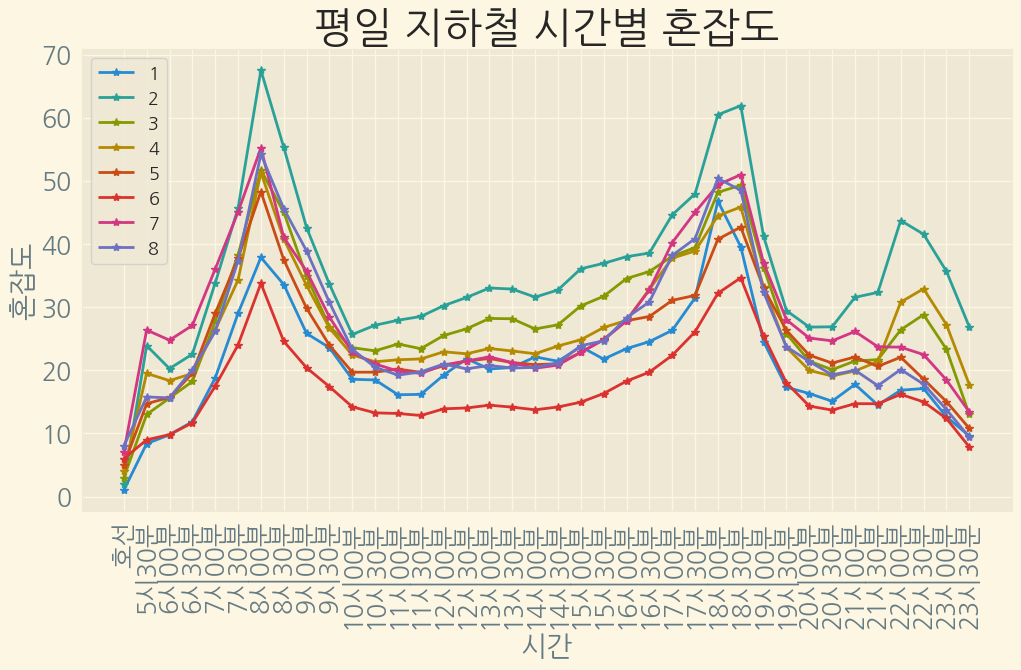

In [69]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_T ,'-*')
plt.title('평일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_T.columns)
plt.show()

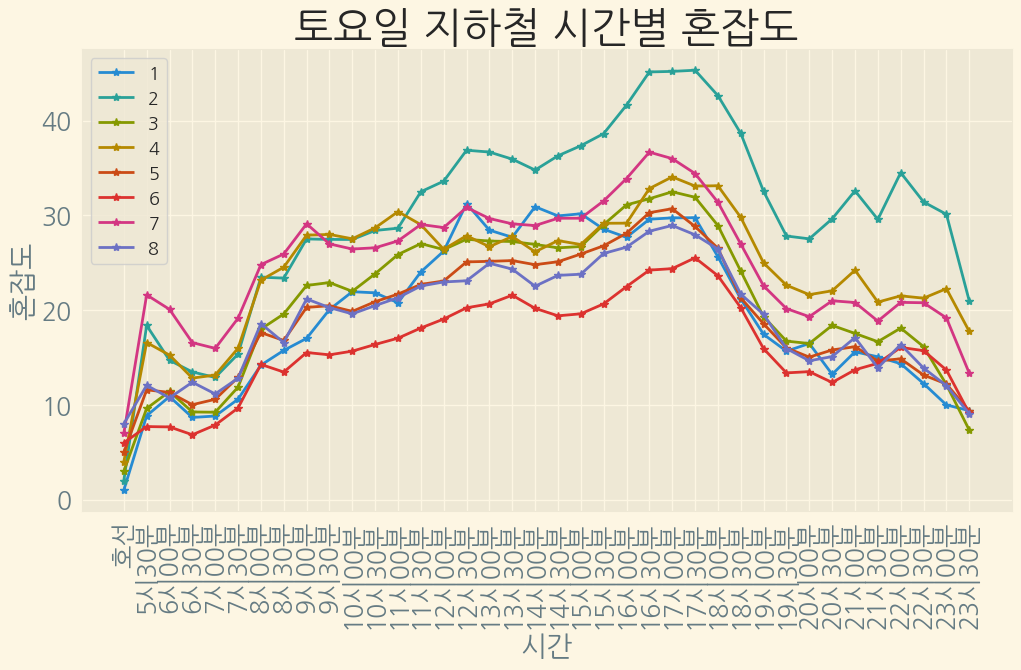

In [70]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_sat_T ,'-*')
plt.title('토요일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_sat_T.columns)
plt.show()

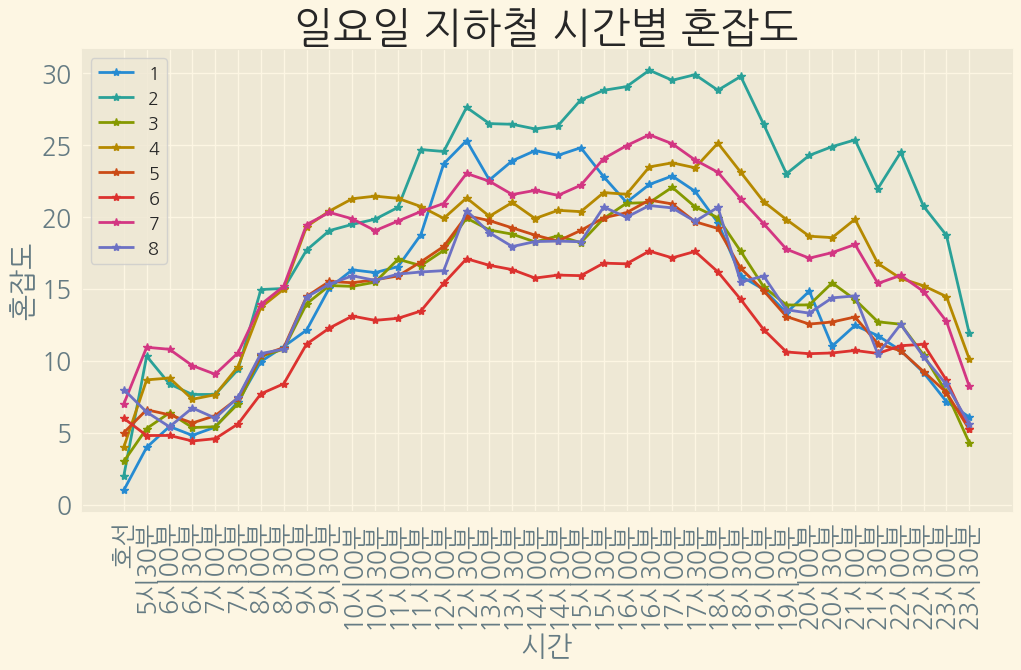

In [71]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_sun_T ,'-*')
plt.title('일요일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_sun_T.columns)
plt.show()

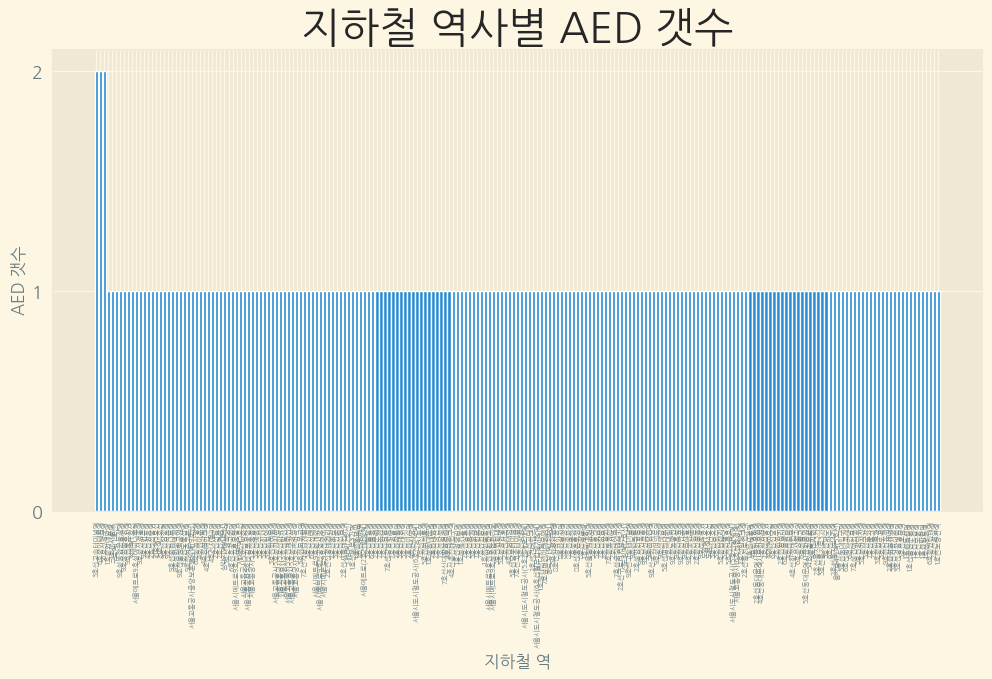

In [72]:
from collections import Counter # 중복된 갯수를 세기위한 라이브러리 가져오기 


# AED 위치 정보 파일 데이터 가져오기
df_AED = pd.read_csv('data/AED.csv',encoding='euc-kr')

# 원본 손상을 방지하기 위해 복사본 만들기
df_AED_ = df_AED.copy()

# 특정 컬럼 추출 
gg = df_AED_['설치기관명']

# 설치기관명 이름에서 공백 지우기
new_gg = [i.replace(' ', '') for i in gg]

# 중복된 값을 찾기 
new_gg_counter = Counter(new_gg)

# 데이터 프레임을 만들기 위한 시리즈 만들기
data = pd.Series(new_gg_counter)
data.name = '위치별 갯수'
data.index.name = '장소'


# 데이터 프레임 만들기
df_data = pd.DataFrame(data).sort_values(by='위치별 갯수', ascending=False)
df_data['장소'] = df_data.index
df_data

# 새로 만든 데이터 프레임에서 원하는 값만 추출하기 
new_data = df_data[df_data['장소'].str.contains("호선", na=False, case=False)]


# 그래프 만들기
fig = plt.figure(figsize=(12,6))
plt.bar(new_data['장소'], new_data['위치별 갯수'])
plt.title('지하철 역사별 AED 갯수',size=30)
plt.xlabel('지하철 역')
plt.ylabel('AED 갯수')
plt.xticks(rotation=90, size =5)
plt.yticks([0,1,2])
plt.show()


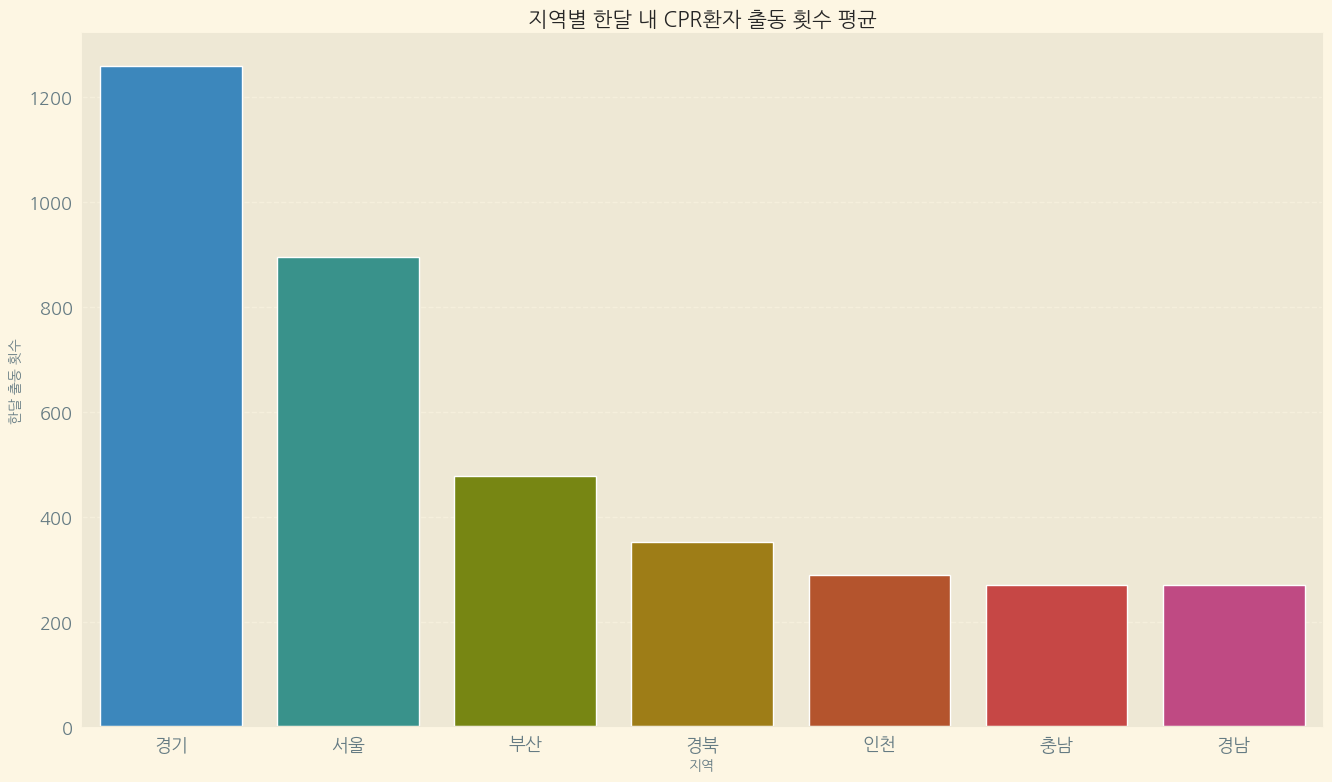

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,평균
시도본부,,,,,,,,,,,,,
서울,1057,806,923,845,892,792,828,828,856,910,954,1036,893.916667
부산,610,509,524,467,456,380,433,408,381,480,536,552,478.000000
대구,258,221,252,227,237,206,214,207,226,234,254,259,232.916667
인천,327,254,278,252,294,241,273,298,279,319,294,354,288.583333
광주,119,109,107,105,114,100,105,113,110,109,124,141,113.000000
대전,143,128,131,136,144,106,113,122,118,129,138,151,129.916667
울산,91,122,92,95,95,86,92,92,112,109,100,106,99.333333
세종,20,14,14,17,19,18,11,15,26,24,22,22,18.500000
경기,1361,1199,1274,1242,1302,1181,1247,1178,1155,1246,1345,1363,1257.750000


In [73]:
df_cpr = pd.read_csv('data/cpr.csv',encoding='euc-kr',index_col = '시도본부')
# fourth_mean = fourth_station_data.sort_values(by='평균', ascending= False).head(10)


df_cpr['평균'] = df_cpr.mean(axis=1)
df_cpr

df_cpr_mean = df_cpr.sort_values(by='평균' , ascending=False).head(7)
df_cpr_mean

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple']

fig = plt.figure(figsize=(16,9))
plt.title('지역별 한달 내 CPR환자 출동 횟수 평균', size=15)
sns.barplot(x=df_cpr_mean.index, y=df_cpr_mean.평균, errwidth=0.3 )
# plt.bar(df_cpr_mean.index, df_cpr_mean.평균, width= 0.5)
plt.grid(True, axis='y', alpha=0.5, linestyle = '--')
plt.xlabel('지역', size=10)
plt.ylabel('한달 출동 횟수', size=10)
plt.show()

df_cpr

# <강지인>

In [74]:
# 전체 설정
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 13
mpl.rcParams['figure.figsize'] = (10,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [75]:
# 폰트 설정
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=None):
    print(mpl.font_manager.FontProperties(fname=font).get_name()) 
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

Sitka Small
Maiandra GD
Segoe UI
Palatino Linotype
HYHeadLine-Medium
Segoe UI
Imprint MT Shadow
Georgia
Niagara Solid
Yu Gothic
Century Gothic
Rockwell Extra Bold
Ebrima
Corbel
Yet R
Pristina
Bradley Hand ITC
Century Schoolbook
Matura MT Script Capitals
Leelawadee UI
Microsoft Tai Le
Bodoni MT
Bookman Old Style
Monotype Corsiva
Rockwell Condensed
Constantia
MS Reference Sans Serif
Verdana
Lucida Sans
Onyx
Garamond
Corbel
OCR A Extended
Tempus Sans ITC
Lucida Sans Typewriter
Microsoft Sans Serif
Old English Text MT
Mistral
Goudy Old Style
Rockwell Condensed
HYPost-Light
Leelawadee UI
HYPost-Light
Segoe UI Historic
Bookman Old Style
Georgia
Lucida Fax
HYPMokGak-Bold
Webdings
Bookman Old Style
STXinwei
Modern No. 20
Lucida Sans Unicode
Copperplate Gothic Bold
MT Extra
Corbel
HYGothic-Medium
Matura MT Script Capitals
Gadugi
Courier New
Agency FB
Lucida Fax
MoeumT R
Perpetua Titling MT
Candara
Comic Sans MS
Harrington
Bauhaus 93
Goudy Old Style
Sitka Small
Times New Roman
Goudy Old Style
Ca

In [76]:
# 인코딩 언어 설정
mpl.rcParams['axes.unicode_minus'] = False

> ## 출처 :  한국소비자원안전감시국 생활안전팀 - 자동심장충격기안전·교육 실태조사 (2017.12)

# AED 목격 장소(복수응답)

### 공공장소에서 AED가 설치된 장소를 본 경험이 있는 응답자는 662(66.2%)명입니다.
### 목격 장소는 '지하철역'이 가장 많았고, '공공기관', '공항', '병원' 순으로 나뉘었습니다.

> ### 항목이 많아 pie chart 형태로 시각화 하기에는 눈에 보이는 불편함(글씨가 겹침)이 있어서
> ### seaborn의 barplot을 사용하여 목격장소의 비율이 한눈에 보이도록 시각화 하였습니다.

In [77]:
data = {
    "지하철":[60.9],
    "공공기관(주민센터, 보건소 등)":[37.8],
    "공항":[26.7],
    "병원":[26.1],
    "기차역":[22.2],
    "버스터미널":[20.4],
    "고속도로휴게소":[19.9],
    "아파트 단지 내":[17.4],
    "학교":[12.7],
    "체육시설":[9.1],
    "공중전화 부스":[6.3],
    "여객선터미널":[5.7],
    "항공기 내":[4.5],
    "현금자동입출금기":[3.8],
    "회사":[2],
    "선박":[1.7],
    "마트":[0.5],
    "오피스텔, 빌딩 내":[0.5],
    "교회":[0.5],
    "자연휴양림/수목원":[0.5],
    "군대":[0.3],
    "문화시설":[0.3],
    "대중교통":[0.3],
    "공원":[0.2],
    "복합쇼핑몰":[0.2],
    "장례식장":[0.2],
    "사우나":[0.2],
    "기타":[0.2],
}
columns = ["지하철","공공기관(주민센터, 보건소 등)","공항","병원","기차역","버스터미널","고속도로휴게소","아파트 단지 내",
           "학교","체육시설","공중전화 부스","여객선터미널","항공기 내","현금자동입출금기","회사","선박","마트",
           "오피스텔, 빌딩 내","교회","자연휴양림/수목원","군대","문화시설","대중교통","공원","복합쇼핑몰","장례식장",
           "사우나","기타"]
index = ["응답수"]

aed_see = pd.DataFrame(data, index = index, columns = columns)

In [78]:
aed_see

,지하철,"공공기관(주민센터, 보건소 등)",공항,병원,기차역,버스터미널,고속도로휴게소,아파트 단지 내,학교,체육시설,...,교회,자연휴양림/수목원,군대,문화시설,대중교통,공원,복합쇼핑몰,장례식장,사우나,기타
응답수,60.9,37.8,26.7,26.1,22.2,20.4,19.9,17.4,12.7,9.1,...,0.5,0.5,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2


In [79]:
# 2차원 리스트 배열 1차원으로 바꿔주기
aed_see_p = aed_see.values.flatten()
aed_see_p

array([60.9, 37.8, 26.7, 26.1, 22.2, 20.4, 19.9, 17.4, 12.7,  9.1,  6.3,
        5.7,  4.5,  3.8,  2. ,  1.7,  0.5,  0.5,  0.5,  0.5,  0.3,  0.3,
        0.3,  0.2,  0.2,  0.2,  0.2,  0.2])

In [80]:
aed_see.columns

Index(['지하철', '공공기관(주민센터, 보건소 등)', '공항', '병원', '기차역', '버스터미널', '고속도로휴게소',
       '아파트 단지 내', '학교', '체육시설', '공중전화 부스', '여객선터미널', '항공기 내', '현금자동입출금기',
       '회사', '선박', '마트', '오피스텔, 빌딩 내', '교회', '자연휴양림/수목원', '군대', '문화시설', '대중교통',
       '공원', '복합쇼핑몰', '장례식장', '사우나', '기타'],
      dtype='object')

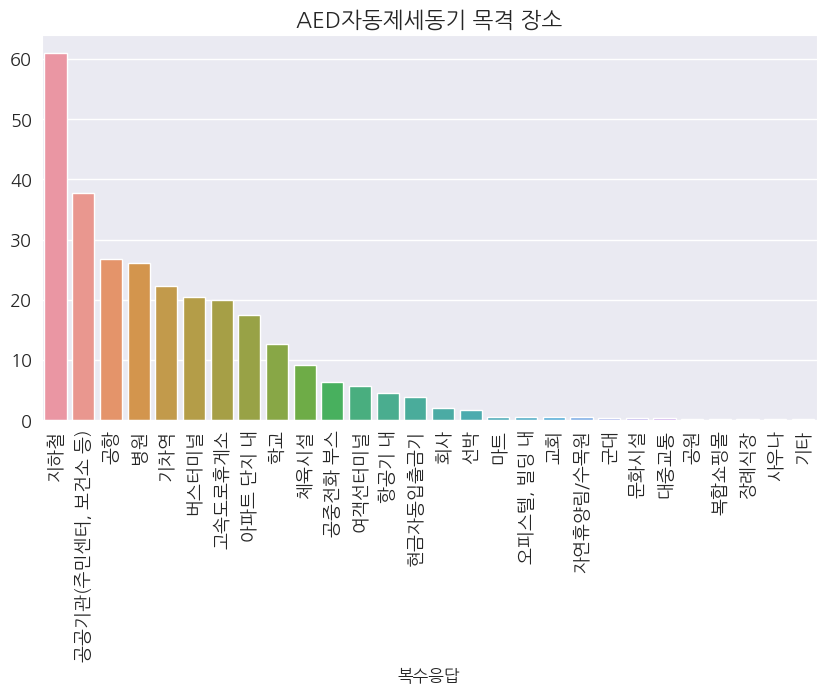

In [81]:
plt.title('AED자동제세동기 목격 장소')
sns.barplot(x = aed_see.columns, y = aed_see_p)
plt.xlabel('복수응답')
plt.xticks(rotation = 90)
plt.show()

# AED 설치 인지도

### AED(자동제세동기)  설치 여부를 알고 있는 응답자는 780(78.0%)명입니다.
> ### Matplotlib의 pie chart로 인지하고 있는 응답자와 그렇지 않은 응답자를 구분하였습니다

In [82]:
data = {
    "전혀 모름" : [4.1],
    "잘 모름":[17.9],
    "대략 알고 있음":[61.5],
    "정확히 알고 있음":[16.5]
}

columns = ["전혀 모름","잘 모름","대략 알고 있음","정확히 알고 있음"]
index = ["응답수"]

aed_iknow = pd.DataFrame(data, index = index, columns = columns)

In [83]:
aed_iknow

,전혀 모름,잘 모름,대략 알고 있음,정확히 알고 있음
응답수,4.1,17.9,61.5,16.5


In [84]:
# 2차원 리스트 배열 1차원으로 바꿔주기
aed_ik = aed_iknow.values.flatten()
aed_ik

array([ 4.1, 17.9, 61.5, 16.5])

In [85]:
aed_iknow.columns

Index(['전혀 모름', '잘 모름', '대략 알고 있음', '정확히 알고 있음'], dtype='object')

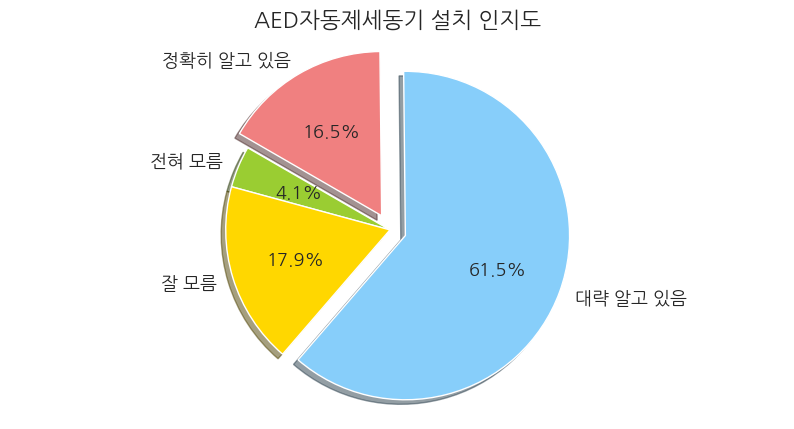

In [86]:
labels = aed_iknow.columns
sizes = aed_ik
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = (0,0,0.1,0.1)
plt.title('AED자동제세동기 설치 인지도')
plt.pie(sizes, explode = explode, labels = labels, colors=colors,
        autopct = '%1.1f%%' , shadow = True, startangle = 150)
plt.axis('equal') # 원의 형태를 유지
plt.show()

In [87]:
# 전체 설정
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 13
mpl.rcParams['figure.figsize'] = (10,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [88]:
# 폰트 설정
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=None):
    print(mpl.font_manager.FontProperties(fname=font).get_name()) 
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

Sitka Small
Maiandra GD
Segoe UI
Palatino Linotype
HYHeadLine-Medium
Segoe UI
Imprint MT Shadow
Georgia
Niagara Solid
Yu Gothic
Century Gothic
Rockwell Extra Bold
Ebrima
Corbel
Yet R
Pristina
Bradley Hand ITC
Century Schoolbook
Matura MT Script Capitals
Leelawadee UI
Microsoft Tai Le
Bodoni MT
Bookman Old Style
Monotype Corsiva
Rockwell Condensed
Constantia
MS Reference Sans Serif
Verdana
Lucida Sans
Onyx
Garamond
Corbel
OCR A Extended
Tempus Sans ITC
Lucida Sans Typewriter
Microsoft Sans Serif
Old English Text MT
Mistral
Goudy Old Style
Rockwell Condensed
HYPost-Light
Leelawadee UI
HYPost-Light
Segoe UI Historic
Bookman Old Style
Georgia
Lucida Fax
HYPMokGak-Bold
Webdings
Bookman Old Style
STXinwei
Modern No. 20
Lucida Sans Unicode
Copperplate Gothic Bold
MT Extra
Corbel
HYGothic-Medium
Matura MT Script Capitals
Gadugi
Courier New
Agency FB
Lucida Fax
MoeumT R
Perpetua Titling MT
Candara
Comic Sans MS
Harrington
Bauhaus 93
Goudy Old Style
Sitka Small
Times New Roman
Goudy Old Style
Ca

In [89]:
# 인코딩 언어 설정
mpl.rcParams['axes.unicode_minus'] = False

> ## 출처 :  한국소비자원안전감시국 생활안전팀 - 자동심장충격기안전·교육 실태조사 (2017.12)

# AED 설치 인식도(거주자)

### 1,000명 중 501(50.1%)명은 현재 거주지와 인근에 AED 설치 여부, 위치를 알지 못했고,
### 206(20.6%)명만 설치위치를 알고 있었습니다. 
> ### Matplotlib의 pie chart로 설문 조사 결과를 나타내었습니다.

In [90]:
data = {
    "설치여부 모름":[50.1],
    "설치 위치 알고 있음":[20.6],
    "설치는 되어 있으나 설치 위치는 모름":[16.7],
    "설치되어 있지 않음":[12.6],
}
columns = ["설치여부 모름","설치 위치 알고 있음","설치는 되어 있으나 설치 위치는 모름","설치되어 있지 않음"]
index = ["응답수"]

aed_install = pd.DataFrame(data, index = index, columns = columns)

In [91]:
aed_install

,설치여부 모름,설치 위치 알고 있음,설치는 되어 있으나 설치 위치는 모름,설치되어 있지 않음
응답수,50.1,20.6,16.7,12.6


In [92]:
# 2차원 리스트 배열 1차원으로 바꿔주기
install_p = aed_install.values.flatten()
install_p

array([50.1, 20.6, 16.7, 12.6])

In [93]:
aed_install.columns

Index(['설치여부 모름', '설치 위치 알고 있음', '설치는 되어 있으나 설치 위치는 모름', '설치되어 있지 않음'], dtype='object')

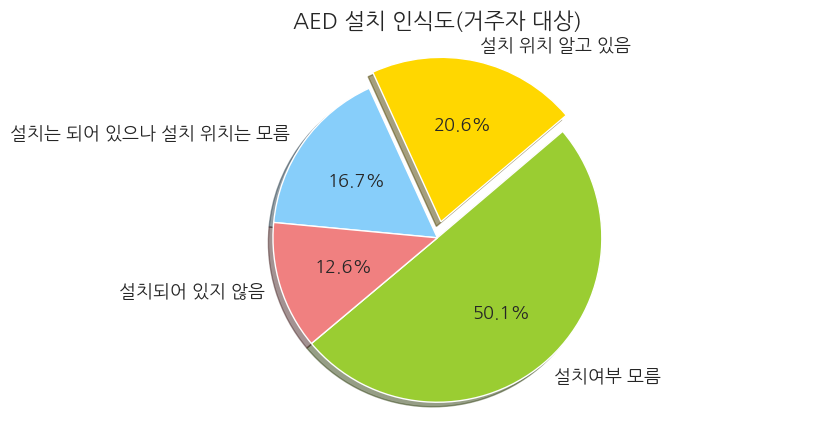

In [94]:
labels = aed_install.columns
sizes = install_p
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = (0,0.1,0,0)
plt.title('AED 설치 인식도(거주자 대상)')
plt.pie(sizes, explode = explode, labels = labels, colors=colors,
        autopct = '%1.1f%%' , shadow = True, startangle = 220)
plt.axis('equal') # 원의 형태를 유지
plt.show()

# AED 사용 의사

### 심정지 환자를 마주할 경우 AED(자동제세동기)를 사용할 의사가 있는 응답자는 800(80.0%)명입니다.
> ### Matplotlib의 pie chart로 설문 조사 결과를 나타내었습니다.

In [95]:
data = {
    "사용의사 있음": 80.0,
    "사용의사 없음": 20.0  
}
columns = ["사용의사 있음", "사용의사 없음"]
index = ["응답수"]

aed_used = pd.DataFrame(data, index = index, columns = columns)
aed_used

,사용의사 있음,사용의사 없음
응답수,80.0,20.0


In [96]:
# 2차원 리스트 배열 1차원으로 바꿔주기
used_na = aed_used.values.flatten()
used_na

array([80., 20.])

In [97]:
aed_used.columns

Index(['사용의사 있음', '사용의사 없음'], dtype='object')

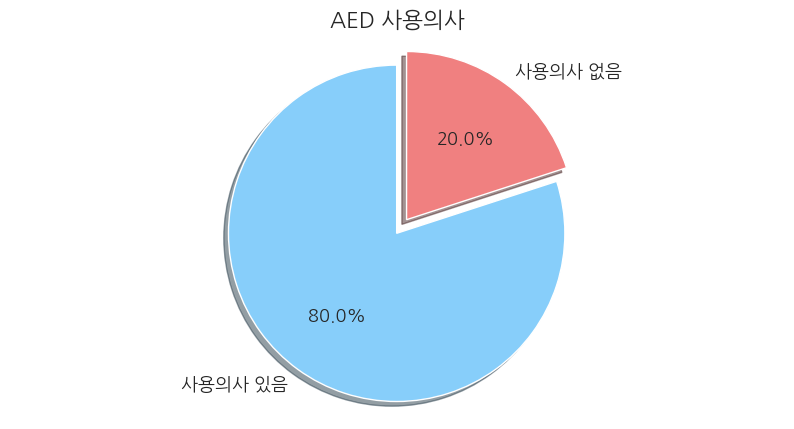

In [98]:
labels = aed_used.columns
sizes = used_na
colors = ['lightskyblue','lightcoral']
explode = (0,0.1)
plt.title('AED 사용의사')
plt.pie(sizes, explode = explode, labels = labels, colors=colors,
        autopct = '%1.1f%%' , shadow = True, startangle = 90)
plt.axis('equal') # 원의 형태를 유지
plt.show()

# AED 미사용 이유(복수응답)

### 사용의사가 없는 이유에 대해 조사 해 보았을 때 ‘사용법을 몰라서’가 122(61.0%)명으로 가장 많았고, 
### ‘만약의 경우 환자의 상태를 악화시킬까봐',  ‘자신감이 없어서’ 등의 이유로 미사용한다고 나타났습니다.
> ### Matplotlib의 pie chart로 설문 조사 결과를 나타내었습니다.

In [99]:
data = {
    "사용법을 몰라서":[61.0],
    "만약의 경우 환자의 상태를 악화시킬까봐":[45.0],
    "자신감이 없어서":[43.5],
    "심정지 여부를판단할 수 없어서":[27.0],
    "소송 등 법적 분쟁이 우려돼서":[22.5],
    "기기 오작동이 우려돼서":[14.0]
}
columns = ["사용법을 몰라서","만약의 경우 환자의 상태를 악화시킬까봐","자신감이 없어서",
           "심정지 여부를판단할 수 없어서","소송 등 법적 분쟁이 우려돼서","기기 오작동이 우려돼서"]
index = ["응답수"]

aed_nu = pd.DataFrame(data, index = index, columns = columns)
aed_nu

,사용법을 몰라서,만약의 경우 환자의 상태를 악화시킬까봐,자신감이 없어서,심정지 여부를판단할 수 없어서,소송 등 법적 분쟁이 우려돼서,기기 오작동이 우려돼서
응답수,61.0,45.0,43.5,27.0,22.5,14.0


In [100]:
# 2차원 리스트 배열 1차원으로 바꿔주기
nu_servey = aed_nu.values.flatten()
nu_servey

array([61. , 45. , 43.5, 27. , 22.5, 14. ])

In [101]:
aed_nu.columns

Index(['사용법을 몰라서', '만약의 경우 환자의 상태를 악화시킬까봐', '자신감이 없어서', '심정지 여부를판단할 수 없어서',
       '소송 등 법적 분쟁이 우려돼서', '기기 오작동이 우려돼서'],
      dtype='object')

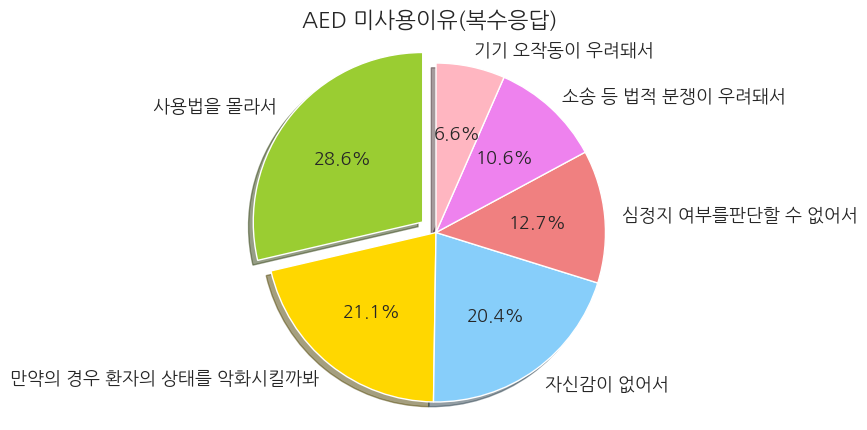

In [102]:
labels = aed_nu.columns
sizes = nu_servey
colors = ['yellowgreen','gold','lightskyblue','lightcoral','violet','lightpink']
explode = (0.1,0,0,0,0,0)
plt.title('AED 미사용이유(복수응답)')
plt.pie(sizes, explode = explode, labels = labels, colors=colors,
        autopct = '%1.1f%%' , shadow = True, startangle = 90)
plt.axis('equal') # 원의 형태를 유지
plt.show()

# AED 교육 필요성

### AED 교육이 필요하다고 말한 응답자는 912(91.2%)명입니다.
> ### pie chart보다 barh를 사용하여 대비를 직관적으로 느낄 수 있게 표현했습니다.

In [103]:
data = {
    "매우 필요":[37.9],
    "필요":[53.3],
    "보통":[8.5],
    "불필요":[0.3],
}
columns = ["매우 필요","필요","보통","불필요"]
index = ["응답수"]

aed_study = pd.DataFrame(data, index = index, columns = columns)
aed_study

,매우 필요,필요,보통,불필요
응답수,37.9,53.3,8.5,0.3


In [104]:
# 2차원 리스트 배열 1차원으로 바꿔주기
study_survey = aed_study.values.flatten()
study_survey

array([37.9, 53.3,  8.5,  0.3])

In [105]:
aed_study.columns

Index(['매우 필요', '필요', '보통', '불필요'], dtype='object')

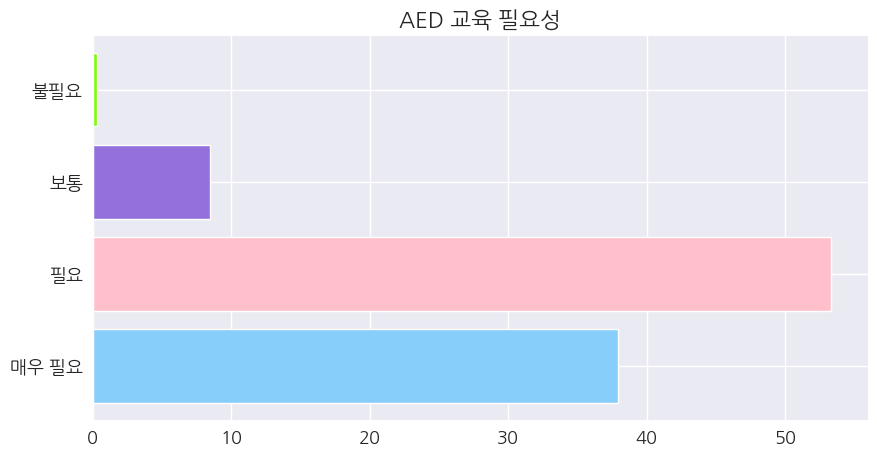

In [106]:
labels = aed_study.columns
value = study_survey  
colors = ['lightskyblue','pink','mediumpurple','lawngreen']

plt.title('AED 교육 필요성')
plt.barh(labels,value, color = colors)
plt.show()

# AED 효과적 교육 방법(복수응답)

### AED 교육이 필요하다고 답변한 912명중 888(97.4%)명은 '개인별 실습'을 가장 효과적인 교육 방법으로 꼽았고,
### '강사 시범', '동영상' 의 순으로 나타났습니다.
> ### pie chart보다 barh를 사용하여 대비를 직관적으로 느낄 수 있게 표현했습니다.

In [107]:
 data = {
    "개인별 실습":[97.4],
    "강사 시범":[96.9],
    "동영상":[88.8],
    "이론":[51.4],
    "시뮬레이션":[0.3],
    "TV 방송":[0.1]
}
columns = ["개인별 실습","강사 시범","동영상","이론","시뮬레이션","TV 방송"]
index = ["응답수"]

aed_effective = pd.DataFrame(data, index = index, columns = columns)
aed_effective

,개인별 실습,강사 시범,동영상,이론,시뮬레이션,TV 방송
응답수,97.4,96.9,88.8,51.4,0.3,0.1


In [108]:
# 2차원 리스트 배열 1차원으로 바꿔주기
effective_survey = aed_effective.values.flatten()
effective_survey

array([97.4, 96.9, 88.8, 51.4,  0.3,  0.1])

In [109]:
aed_effective.columns

Index(['개인별 실습', '강사 시범', '동영상', '이론', '시뮬레이션', 'TV 방송'], dtype='object')

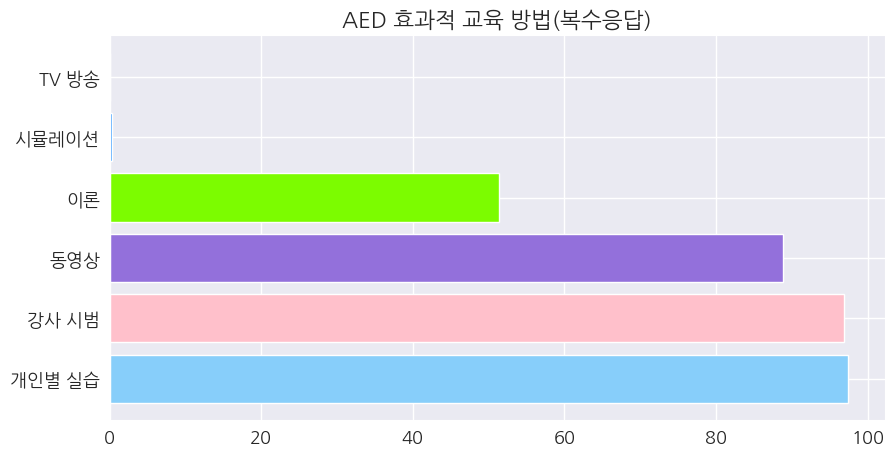

In [110]:
labels = aed_effective.columns
value = effective_survey  
colors = ['lightskyblue','pink','mediumpurple','lawngreen','dodgerblue','moccasin']

plt.title('AED 효과적 교육 방법(복수응답)')
plt.barh(labels,value, color = colors)
plt.show()

# AED 교육 반복 교육 적정 주기

### 교육을 진행하게 된다면 어느 적정 주기별로 교육을 반복할 것인가에 대한 답변으로
### '1년/1회' 주기의 반복 교육이 적정하다는 의견이 371(45.9%)명으로 가장 많았습니다.
### 다음으로 '6개월/1회', '2년/1회' 순으로 응답했습니다.
> ### pie chart보다 barh를 사용하여 대비를 직관적으로 느낄 수 있게 표현했습니다.

In [111]:
 data = {
    "6개월/1회":[30.8],
    "1년/1회":[45.9],
    "2년/1회":[15.7],
    "3년/1회":[5.4],
    "4년/1회":[0.5],
    "5년/1회":[1.6]
}
columns = ["5년/1회","4년/1회","3년/1회","2년/1회", "1년/1회", "6개월/1회"]
    #columns = ["6개월/1회","1년/1회","2년/1회","3년/1회","4년/1회","5년/1회"]
index = ["응답수"]

aed_year = pd.DataFrame(data, index = index, columns = columns)
aed_year

,5년/1회,4년/1회,3년/1회,2년/1회,1년/1회,6개월/1회
응답수,1.6,0.5,5.4,15.7,45.9,30.8


In [112]:
aed_year.columns

Index(['5년/1회', '4년/1회', '3년/1회', '2년/1회', '1년/1회', '6개월/1회'], dtype='object')

In [113]:
# 2차원 리스트 배열 1차원으로 바꿔주기
year_survey = aed_year.values.flatten()
year_survey

array([ 1.6,  0.5,  5.4, 15.7, 45.9, 30.8])

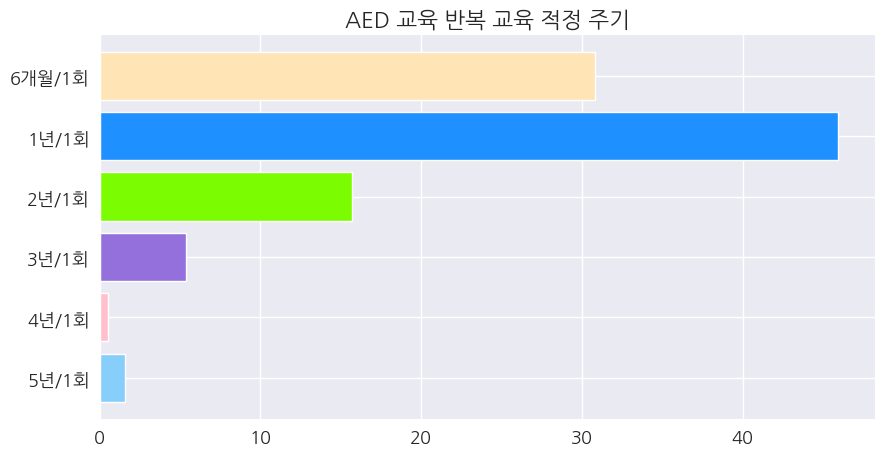

In [114]:
labels = aed_year.columns
value = year_survey  
colors = ['lightskyblue','pink','mediumpurple','lawngreen','dodgerblue','moccasin']

plt.title('AED 교육 반복 교육 적정 주기')
plt.barh(labels,value, color = colors)
plt.show()

# <선주 , 데이터 가공 및 추출> 
# <유림 , 데이터 가공 및 추출, 지도 시각화>

# 서울시 AED 위치

In [115]:
from ipyleaflet import Map, Marker, MarkerCluster, Icon

In [118]:
#데이터 불러오기 (data 출처 : )
AED_total_df = pd.read_csv('C:/python/data/자동심장 충격기 정보 조회(AED)(표준 데이터).csv', encoding = 'euc-kr')
print('='*80)
print('자동심장 충격기 정보 조회')
display(AED_total_df.head(5))

자동심장 충격기 정보 조회


,AED모델명,우편번호(앞자리),우편번호(뒤자리),관리책임자명,관리자연락처,설치기관주소,설치기관전화번호,설치위치,제조사,설치기관명,경도,위도
0,i-PAD NFK200,43,98,최형용,02-2199-8686,서울특별시 용산구 서빙고로 279,02-2199-8686,1층 민원실,(주)씨유네트웍스,서빙고동주민센터,126.994353,37.520253
1,NF1200,43,68,김용인,02-707-2492,서울특별시 용산구 백범로 350,02-707-2492,3층 헬스장,씨유메디컬시스템,용산구문화체육센터(용산구시설관리공단),126.967628,37.537242
2,i-PAD NFK200,43,35,심애숙,070-4658-1107,서울특별시 용산구 두텁바위로 25,070-4658-1107,2층 현관 엘리베이터 옆,(주)씨유네트웍스,갈월종합사회복지관,126.974825,37.545774
3,HeartPro NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동 경비실,나눔테크,도봉극동아파트,127.049310,37.682624
4,NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동,(주)나눔테크,도봉극동아파트,127.049310,37.682623


In [119]:
AED_total_df['구군명'] = AED_total_df['설치기관주소'].str.split(' ').str[1]
AED_total_df

,AED모델명,우편번호(앞자리),우편번호(뒤자리),관리책임자명,관리자연락처,설치기관주소,설치기관전화번호,설치위치,제조사,설치기관명,경도,위도,구군명
0,i-PAD NFK200,43,98,최형용,02-2199-8686,서울특별시 용산구 서빙고로 279,02-2199-8686,1층 민원실,(주)씨유네트웍스,서빙고동주민센터,126.994353,37.520253,용산구
1,NF1200,43,68,김용인,02-707-2492,서울특별시 용산구 백범로 350,02-707-2492,3층 헬스장,씨유메디컬시스템,용산구문화체육센터(용산구시설관리공단),126.967628,37.537242,용산구
2,i-PAD NFK200,43,35,심애숙,070-4658-1107,서울특별시 용산구 두텁바위로 25,070-4658-1107,2층 현관 엘리베이터 옆,(주)씨유네트웍스,갈월종합사회복지관,126.974825,37.545774,용산구
3,HeartPro NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동 경비실,나눔테크,도봉극동아파트,127.049310,37.682624,도봉구
4,NT-280,13,19,최용희,010-9132-2218,서울특별시 도봉구 도봉로180길 77,02-956-1997,2동,(주)나눔테크,도봉극동아파트,127.049310,37.682623,도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046,Heart on A15-G14,51,18,김동한,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,201동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824,광진구
6047,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,202동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824,광진구
6048,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,204동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824,광진구
6049,Heart on A15-G14,51,18,김종규,010-2770-0797,서울특별시 광진구 광나루로56길 32(구의동 구의현대2단지아파트),02-444-6494,203동 1층,메디아나,구의현대2단지아파트,127.096219,37.537824,광진구


In [120]:
#필요한 컬럼만 변수에 따로 저장하기
df_sample = AED_total_df[['구군명','설치기관주소','설치위치','위도','경도']]
display(df_sample.head(3))

,구군명,설치기관주소,설치위치,위도,경도
0,용산구,서울특별시 용산구 서빙고로 279,1층 민원실,37.520253,126.994353
1,용산구,서울특별시 용산구 백범로 350,3층 헬스장,37.537242,126.967628
2,용산구,서울특별시 용산구 두텁바위로 25,2층 현관 엘리베이터 옆,37.545774,126.974825


In [121]:
#데이터 널값 확인하기
print('데이터 널값 확인')
display(df_sample.isnull().sum())

데이터 널값 확인


구군명       0
설치기관주소    0
설치위치      0
위도        0
경도        0
dtype: int64

In [122]:
## 서울시 전체 설치현황 지도 시각화
df_sample = df_sample.drop_duplicates('설치기관주소')

def seoul_map(default_location=[37.541, 126.986], default_zoom_start=15):
    base_map = Map(center=default_location, 
                   zoom=default_zoom_start)
    icon = Icon(icon_url='https://cdn1.iconfinder.com/data/icons/fillicons-medical-1/2000/Heartbeat-512.png', icon_size=[38, 38], icon_anchor=[22,94])


    markers = []
    
    # 구군별  icon 생성
    for row in df_sample.itertuples():
        구군명,설치기관주소,설치위치,위도,경도 = row[1:]

        # click시 나타나는 popup marker 설정하기
        markers.append(Marker(location=[위도 , 경도], icon = icon, title=설치기관주소, draggable=False))

    marker_cluster = MarkerCluster(markers=markers)
   
    base_map.add_layer(marker_cluster)
    
    #맵 저장하기 변수명.save('경로.html')
    base_map.save('C:/python/자동심장 충격기 위치 조회(AED).html')
    return base_map

#지도 출력하기
print('='*100)
print('자동심장 충격기 위치 조회(AED)')
print('='*100)
seoul_map()

자동심장 충격기 위치 조회(AED)


Map(center=[37.541, 126.986], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [125]:
# 원하는 위치 AED 위치 찾기

area = input("서울특별시 안의 원하는 구를 입력하세요")
want_data = df_sample["구군명"] == area
df_sample[want_data]

df_sample = df_sample.drop_duplicates('설치기관주소')

def seoul_map_choice(default_location=[37.541, 126.986], default_zoom_start=10):
    base_map = Map(center=default_location, 
                   zoom=default_zoom_start)
    icon = Icon(icon_url='https://cdn1.iconfinder.com/data/icons/fillicons-medical-1/2000/Heartbeat-512.png', icon_size=[38, 38], icon_anchor=[22,94])


    markers = []
    
    # 구군별  icon 생성
    for row in df_sample[want_data].itertuples():
        구군명,설치기관주소,설치위치,위도,경도 = row[1:]

        # click시 나타나는 popup marker 설정하기
        markers.append(Marker(location=[위도 , 경도], icon = icon, title=설치기관주소))

    marker_cluster = MarkerCluster(markers=markers)
   
    base_map.add_layer(marker_cluster)
    
    #맵 저장하기 변수명.save('경로.html')
    base_map.save('C:/python/자동심장 충격기 위치 조회(AED)_지역선택.html')
    return base_map

#지도 출력하기
print('='*100)
print('서울시 자동심장 충격기 위치 조회(AED)_지역선택')
print('='*100)
seoul_map_choice()

서울특별시 안의 원하는 구를 입력하세요 강남구


서울시 자동심장 충격기 위치 조회(AED)_지역선택


Map(center=[37.541, 126.986], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

----------------------------------------------------------------------------------------------------------------------------------------

# 서울시 주민센터 AED 유무

In [126]:
subway_traffic_df = pd.read_csv('data/서울교통공사_지하철혼잡도정보_20211231.csv', encoding='euc-kr')
subway_traffic_df

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1700,1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1701,1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5
1702,1703,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,...,4.7,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8


In [127]:
aed_df = pd.read_csv('data/서울시 설치된장소.csv', encoding='UTF-8')
aed_df

,AED모델명,우편번호(앞자리),우편번호(뒤자리),관리책임자명,관리자연락처,설치기관주소,설치기관명,설치장소,경도,위도
0,i-PAD NFK200,43,98,최형용,02-2199-8686,서울특별시 용산구 서빙고로 279,서빙고동주민센터,서빙,126.994353,37.520253
1,HeartOn A10,66,37,최영은,2155-7406,서울특별시 서초구 사임당로 89 서초1동주민센터 (서초동),서초1동주민센터,서초,127.019467,37.490192
2,HeartOn A10,66,24,김건영,011-296-8179,서울특별시 서초구 서초대로70길 51 서초2동주민센터 (서초동),서초2동주민센터,서초,127.024948,37.492069
3,HeartOn A10,67,16,김건영,011-740-4622,서울특별시 서초구 반포대로 34(서초동),서초3동주민센터,서초,127.011991,37.483716
4,HeartOn A10,66,9,김건영,010-2209-5631,서울특별시 서초구 서운로26길 3,서초4동주민센터,서초,127.022171,37.502707
...,...,...,...,...,...,...,...,...,...,...
211,CU-SP1,88,59,김지호,02-839-3071~3,서울특별시 관악구 난곡로 67 난향동주민센터 (신림동),난향동주민센터,난향,126.918796,37.461519
212,CU-SP1,87,62,박주영,02-839-3051~3,서울특별시 관악구 남부순환로 1517-1 신사동주민센터 (신림동),신사동주민센터,신사,126.919111,37.482956
213,CU-SP1,87,66,오기화,02-881-4630,서울특별시 관악구 조원로12길 25 조원동주민센터 (신림동),조원동주민센터,조원,126.907795,37.482563
214,CU-SP1,87,30,송민기,02-881-4090,서울특별시 관악구 관악로40길 39 청림동 주민센터 (봉천동),청림동주민센터,청림,126.958628,37.491847


In [128]:
# 설치된 주민센터 : list_aed_df_office_only
aed_df_office = aed_df["설치장소"]
list_aed_df_office = list(aed_df_office)
#list_aed_df_office_only = []
list_aed_df_office = set(list_aed_df_office)
list_aed_df_office = list(list_aed_df_office)

print(len(list_aed_df_office))
print(sorted(list_aed_df_office))

134
['가양', '가회', '갈현', '고덕', '고척', '공항', '광장', '광희', '교남', '구산', '구의', '금호', '길동', '낙성', '난곡', '난향', '남가', '남현', '노량', '녹번', '답십', '당산', '대림', '대학', '도봉', '독산', '동화', '둔촌', '등촌', '마장', '망우', '면목', '명일', '목', '무악', '문래', '미아', '반포', '방배', '방이', '방학', '방화', '번', '보라', '부암', '북가', '북아', '불광', '사당', '사직', '삼각', '삼성', '삼양', '삼청', '상도', '상봉', '상일', '서교', '서빙', '서원', '서초', '성내', '성수', '성현', '송정', '송중', '송천', '수색', '수유', '숭인', '시흥', '신길', '신내', '신대', '신사', '신원', '신월', '신정', '쌍문', '아현', '암사', '압구', '양재', '양평', '역촌', '연남', '염창', '용문', '용산', '우이', '원효', '위례', '을지', '응봉', '응암', '이문', '이촌', '이태', '이화', '인수', '인헌', '일원', '자양', '잠원', '장충', '전농', '조원', '종로', '중곡', '중화', '증산', '진관', '창', '창신', '천연', '천호', '청림', '청운', '청파', '평창', '필동', '한강', '한남', '합정', '항동', '행당', '행운', '혜화', '화곡', '회현', '효창', '후암', '휘경', '흑석']


In [129]:
# 서울시 전체 주민센터 : set_public_office_df_dong_only
# set_public_office_df_dong_only
public_office_df = pd.read_csv('data/서울시 공공시설 .csv', encoding='euc-kr')
list_public_office_df_dong_only = list(public_office_df["개방장소"])
set_public_office_df_dong_only = set(list_public_office_df_dong_only)
set_public_office_df_dong_only = list(set_public_office_df_dong_only)

print(len(set_public_office_df_dong_only))
sample_li = set_public_office_df_dong_only
set_public_office_df_dong_only = [i.replace(' ', '') for i in sample_li]
print(sorted(set_public_office_df_dong_only))

153
['가락', '가산', '가양', '갈현', '강일', '개봉', '거여', '고덕', '고척', '공릉', '공항', '광장', '광희', '구로', '구의', '금호', '길동', '낙성', '난곡', '난향', '남가', '남현', '능동', '다산', '답십', '당산', '대림', '대학', '도림', '도봉', '독산', '동화', '둔촌', '등촌', '마장', '마천', '망우', '면목', '명동', '명일', '묵', '문래', '문정', '미성', '미아', '반포', '발산', '방배', '방이', '방학', '방화', '번', '보광', '보라', '북가', '북아', '불광', '사근', '삼각', '삼양', '삼전', '상계', '상봉', '상일', '서림', '서빙', '서원', '서초', '석촌', '성내', '성수', '성현', '소공', '송중', '송천', '송파', '수궁', '수색', '수유', '시흥', '신길', '신내', '신당', '신도', '신림', '신사', '신원', '쌍문', '암사', '약수', '양재', '양평', '여의', '연희', '염창', '영등', '오금', '오류', '옥수', '왕십', '용답', '용문', '용산', '용신', '우이', '우장', '원효', '월계', '을지', '응봉', '이문', '이촌', '이태', '인수', '인헌', '자양', '잠실', '잠원', '장안', '장지', '장충', '전농', '제기', '조원', '중계', '중곡', '중림', '중앙', '중화', '창', '천호', '청구', '청량', '청룡', '청림', '청파', '풍납', '필동', '하계', '한강', '한남', '행당', '행운', '홍은', '홍제', '화곡', '화양', '황학', '회기', '회현', '효창', '후암', '휘경']


In [130]:
# 전체 - 설치된 곳 : list_no_aed_office
list_no_aed_office = []

for i in set_public_office_df_dong_only: # 전체 주민센터
    if i not in list_aed_df_office: # AED 보유 주민센터
        list_no_aed_office.append(i)

print(len(list_no_aed_office))
print(sorted(list_no_aed_office))

57
['가락', '가산', '강일', '개봉', '거여', '공릉', '구로', '능동', '다산', '도림', '마천', '명동', '묵', '문정', '미성', '발산', '보광', '사근', '삼전', '상계', '서림', '석촌', '소공', '송파', '수궁', '신당', '신도', '신림', '약수', '여의', '연희', '영등', '오금', '오류', '옥수', '왕십', '용답', '용신', '우장', '월계', '잠실', '장안', '장지', '제기', '중계', '중림', '중앙', '청구', '청량', '청룡', '풍납', '하계', '홍은', '홍제', '화양', '황학', '회기']


--------------------------------------------------------

In [132]:
#데이터 불러오기 
AED_total_df = pd.read_csv('C:/python/data/서울시 설치된장소.csv', encoding = 'UTF-8')
print('='*80)
print('자동심장 충격기 정보 조회')
display(AED_total_df.head(5))

자동심장 충격기 정보 조회


,AED모델명,우편번호(앞자리),우편번호(뒤자리),관리책임자명,관리자연락처,설치기관주소,설치기관명,설치장소,경도,위도
0,i-PAD NFK200,43,98,최형용,02-2199-8686,서울특별시 용산구 서빙고로 279,서빙고동주민센터,서빙,126.994353,37.520253
1,HeartOn A10,66,37,최영은,2155-7406,서울특별시 서초구 사임당로 89 서초1동주민센터 (서초동),서초1동주민센터,서초,127.019467,37.490192
2,HeartOn A10,66,24,김건영,011-296-8179,서울특별시 서초구 서초대로70길 51 서초2동주민센터 (서초동),서초2동주민센터,서초,127.024948,37.492069
3,HeartOn A10,67,16,김건영,011-740-4622,서울특별시 서초구 반포대로 34(서초동),서초3동주민센터,서초,127.011991,37.483716
4,HeartOn A10,66,9,김건영,010-2209-5631,서울특별시 서초구 서운로26길 3,서초4동주민센터,서초,127.022171,37.502707


In [133]:
# 설치되어있는 곳
#필요한 컬럼만 변수에 따로 저장하기
df_sample = AED_total_df[['설치장소','설치기관주소','위도','경도']]
display(df_sample.head(3))

,설치장소,설치기관주소,위도,경도
0,서빙,서울특별시 용산구 서빙고로 279,37.520253,126.994353
1,서초,서울특별시 서초구 사임당로 89 서초1동주민센터 (서초동),37.490192,127.019467
2,서초,서울특별시 서초구 서초대로70길 51 서초2동주민센터 (서초동),37.492069,127.024948


In [134]:
public_office_df = pd.read_csv('data/서울시 공공시설 .csv', encoding='euc-kr')
public_office_df

,Unnamed: 0,개방장소명,개방장소,개방시설유형구분,휴관일,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,유료사용여부,...,신청방법구분,시설사진정보,소재지도로명주소,관리기관명,담당부서명,사용안내전화번호,홈페이지주소,위도,경도,데이터기준일자
0,중화1동주민센터 생활체육실,중화1동주민센터,중화,다목적실,토+일,9:00,21:00,0:00,0:00,Y,...,인터넷,NaN,서울특별시 중랑구 동일로134길 17,서울특별시 중랑구 중화동 287-3,서울특별시 중랑구 중화1동주민센터,NaN,02-2094-6334,37.601132,127.080648,2022-09-30
1,중화1동주민센터 대회의실,중화1동주민센터,중화,회의실,토+일,9:00,21:00,0:00,0:00,Y,...,인터넷,NaN,서울특별시 중랑구 동일로134길 17,서울특별시 중랑구 중화동 287-3,서울특별시 중랑구 중화2동주민센터,NaN,02-2094-6334,37.601132,127.080648,2022-09-30
2,신내2동주민센터 대회의실,신내2동주민센터,신내,회의실,일(시설 사정에 따라 변경가능),9:00,21:00,10:00,18:00,Y,...,인터넷,NaN,서울특별시 중랑구 봉화산로 190,서울특별시 중랑구 신내동 665,서울특별시 중랑구 신내2동주민센터,NaN,02-2094-6628,37.606228,127.094147,2022-09-30
3,신내2동주민센터 북카페 회의실,신내2동주민센터,신내,회의실,일(시설 사정에 따라 변경가능),10:00,18:00,10:00,14:00,Y,...,인터넷,NaN,서울특별시 중랑구 봉화산로 190,서울특별시 중랑구 신내동 665,서울특별시 중랑구 신내2동주민센터,NaN,02-2094-6628,37.606228,127.094147,2022-09-30
4,신내1동주민센터 강당,신내1동주민센터,신내,강당,토+일(시설 사정에 따라 변경가능),9:00,21:00,0:00,0:00,Y,...,인터넷,NaN,서울특별시 중랑구 용마산로129나길 35,서울특별시 중랑구 신내동 448-1,서울특별시 중랑구 신내1동주민센터,NaN,02-2094-6573,37.605854,127.099504,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,강동구 성내3동 자치회관 제1강의실(2층),성내3동주민센터,성내,강의실,공휴일,9:00,21:00,9:00,18:00,Y,...,NaN,NaN,서울특별시 강동구 풍성로37가길 62,서울특별시 강동구 성내동 508,서울특별시 강동구청,성내3동,NaN,37.532430,127.129528,2022-08-23
599,강동구 성내3동 자치회관 다목적실(지하1층),성내3동주민센터,성내,다목적실,공휴일,9:00,21:00,9:00,18:00,Y,...,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구 성내동 430-29,서울특별시 강동구청,성내3동,NaN,37.526003,127.132873,2022-08-23
600,강동구 성내3동 자치회관 제2강의실(2층),성내3동주민센터,성내,강의실,공휴일,9:00,21:00,9:00,18:00,Y,...,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구 성내동 430-29,서울특별시 강동구청,성내3동,NaN,37.526003,127.132873,2022-08-23
601,강동구 길동 주민센터 회의실(3층),길동주민센터,길동,회의실,공휴일,9:00,21:00,9:00,18:00,N,...,NaN,NaN,서울특별시 강동구 강동대로53길 76,서울특별시 강동구 성내동 430-29,서울특별시 강동구청,길동,NaN,37.526042,127.132884,2022-08-23


In [135]:
# 서울 공공시설
#필요한 컬럼만 변수에 따로 저장하기
df_sample_2 = public_office_df[['개방장소','소재지도로명주소','위도','경도']]
df_sample_2 = df_sample_2.drop_duplicates('개방장소') # 개방장소의 증복된 값 없애기
for i in df_sample_2['개방장소'].values:
    if i in list_no_aed_office:
        df_sample_2 = df_sample_2.drop(df_sample_2.index[df_sample_2['개방장소'] == i], axis=0)
for j in df_sample_2['소재지도로명주소']:
    if j in df_sample['설치기관주소'].values:
        df_sample_2 = df_sample_2.drop(df_sample_2.index[df_sample_2['소재지도로명주소'] == j], axis=0)
df_sample_2

,개방장소,소재지도로명주소,위도,경도
0,중화,서울특별시 중랑구 동일로134길 17,37.601132,127.080648
2,신내,서울특별시 중랑구 봉화산로 190,37.606228,127.094147
6,상봉,서울특별시 중랑구 동일로114길 10,37.592892,127.080852
15,면목,서울특별시 중랑구 면목로 397,37.587356,127.087555
33,망우,서울특별시 중랑구 망우로 67길 10,37.600561,127.101487
...,...,...,...,...
569,인수,서울특별시 강북구 인수봉로 255,37.641442,127.010583
572,상일,서울특별시 강동구 아리수로93길 9-14,37.565050,127.173907
573,명일,서울특별시 강동구 구천면로 633,37.550584,127.168300
582,암사,서울특별시 강동구 고덕로24길 49,37.552333,127.135721


In [136]:
## 주민센터 설치 된곳, 안된 곳 지도

def seoul_map_set(default_location=[37.541, 126.986], default_zoom_start=15):
    base_map = Map(center=default_location, 
                   zoom=default_zoom_start)
    icon_2 = Icon(icon_url='https://gss0.baidu.com/-fo3dSag_xI4khGko9WTAnF6hhy/zhidao/wh%3D600%2C800/sign=364e1b7fbe315c6043c063e9bd81e72b/c8ea15ce36d3d53960b0b8a93887e950342ab0cf.jpg', icon_size=[38, 38], icon_anchor=[22,94])
    icon = Icon(icon_url='https://cdn1.iconfinder.com/data/icons/fillicons-medical-1/2000/Heartbeat-512.png', icon_size=[38, 38], icon_anchor=[22,94])

    markers = []
    
    # 설치 안된 곳
    for row in df_sample_2.itertuples():
        설치장소,소재지도로명주소,위도,경도 = row[1:]

        # click시 나타나는 popup marker 설정하기
        markers.append(Marker(location=[위도 , 경도], icon = icon_2, title=소재지도로명주소 , draggable=False))
        
     # 설치 된 곳
    for row_1 in df_sample.itertuples():
        설치장소,설치기관주소,위도,경도 = row_1[1:]

        # click시 나타나는 popup marker 설정하기
        markers.append(Marker(location=[위도 , 경도], icon = icon, title=설치기관주소 , draggable=False))


    marker_cluster = MarkerCluster(markers=markers)
   
    base_map.add_layer(marker_cluster)
    
    #맵 저장하기 변수명.save('경로.html')
    base_map.save('C:/python/서울시 주민센터 자동심장 충격기 유무.html')
    return base_map

#지도 출력하기
print('='*100)
print('서울시 주민센터 자동심장 충격기 유무')
print('='*100)
seoul_map_set()

서울시 주민센터 자동심장 충격기 유무


Map(center=[37.541, 126.986], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…